In [44]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib

import warnings
warnings.filterwarnings('ignore')

In [45]:
# Loading file 'NYC TLC Trip Record.csv'

df = pd.read_csv('NYC TLC Trip Record.csv')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


## Data Cleaning

In [46]:
# Skimming dataframe through describe()

df.describe(include='all')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,68211,68211,63887,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
unique,NaN,66575,66519,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2023-01-07 23:58:06,2023-01-06 00:00:00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,6,63579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.863028,NaN,NaN,NaN,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,NaN,NaN,NaN,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,NaN,NaN,NaN,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,NaN,NaN,NaN,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,NaN,NaN,NaN,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000


### Preliminary Cleaning

#### Finding out columns with null values

In [47]:
# Checking columns containing null values in the dataframe

nullval = df.isnull().sum()
print(nullval[nullval > 0])

store_and_fwd_flag       4324
RatecodeID               4324
passenger_count          4324
ehail_fee               68211
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64


#### Finding out duplicated data

In [48]:
# Checking duplicated data through duplicated().sum() function

df.duplicated().sum()

np.int64(0)

In [49]:
# Checking duplicated data with another function

df[df[:].duplicated() == True]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


#### Finding out data types

In [50]:
# Checking columns through .info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [51]:
df['passenger_count'].unique()

array([ 1.,  2.,  4.,  3.,  6.,  5.,  0.,  7.,  9.,  8., nan])

#### Converting time columns from 'object' to 'datetime'

As well as creating new columns that might be useful later

In [52]:
# Converting columns that contains 'Object' type into datetime

df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])


In [53]:
# Creating new columns for further operations and/or analysis including day number of the week (day_week), weekend or weekday (day_week), and hour

df['day_week'] = df['lpep_pickup_datetime'].dt.dayofweek
df['day_type'] = df['day_week'].apply(lambda x: 'weekend' if x >= 5 else 'weekday')
df['hour'] = df['lpep_pickup_datetime'].dt.hour

In [54]:
# New column that contains duration based on drop-off time and pick-up time

df['duration'] = pd.to_datetime(df['lpep_dropoff_datetime']) - pd.to_datetime(df['lpep_pickup_datetime'])

#### Filling in null values, this will be done by using mode

In [55]:
# Checking mode value of one of the columns that contains null value

df['RatecodeID'].mode()[0]

np.float64(1.0)

In [56]:
# Checking proportion of values within columns containing null values

print((df['store_and_fwd_flag'].value_counts()/df['store_and_fwd_flag'].count())*100)
print((df['RatecodeID'].value_counts()/df['RatecodeID'].count())*100)
print((df['payment_type'].value_counts()/df['payment_type'].count())*100)
print((df['trip_type'].value_counts()/df['trip_type'].count())*100)
print((df['congestion_surcharge'].value_counts()/df['congestion_surcharge'].count())*100)

store_and_fwd_flag
N    99.517899
Y     0.482101
Name: count, dtype: float64
RatecodeID
1.0     97.207570
5.0      2.393288
2.0      0.247312
4.0      0.089220
3.0      0.046958
99.0     0.015653
Name: count, dtype: float64
payment_type
1.0    63.684318
2.0    35.425047
3.0     0.738804
4.0     0.148700
5.0     0.003131
Name: count, dtype: float64
trip_type
1.0    97.806722
2.0     2.193278
Name: count, dtype: float64
congestion_surcharge
 0.00    73.561131
 2.75    26.409129
 2.50     0.025044
-2.75     0.004696
Name: count, dtype: float64


In [57]:
# Filling in Null Values

df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
df['payment_type'].fillna(df['payment_type'].mode()[0], inplace=True)
df['trip_type'].fillna(df['trip_type'].mode()[0], inplace=True)
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0], inplace=True)


df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge         0
day_week                     0
day_type                     0
hour                         0
duration                     0
dtype: int64

In [58]:
# Filling in passenger count

df['passenger_count'] = np.where(df['passenger_count'] == 0, df['passenger_count'].quantile(0.5),df['passenger_count'])

#### Eliminating negative trip distance, total amount, and duration

In [59]:
# Eliminating negative trip distance, total amount, and duration

df = df[ (df['trip_distance']>0) & (df['total_amount']>0) & (df['duration']>pd.Timedelta(seconds=1)) ]

#### Eliminating payment charge with values include : charge, dispute, and voided trip

In [60]:
df.value_counts('payment_type')

payment_type
1.0    42608
2.0    21852
3.0      224
4.0       49
Name: count, dtype: int64

In [61]:
# Eliminating payment charge with values include : charge, dispute, and voided trip

df = df[(df['payment_type']!=3) & (df['payment_type']!=4) & (df['payment_type']!=6)]

In [62]:
df.head(100)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_week,day_type,hour,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,NaN,1.0,24.18,1.0,1.0,2.75,6,weekend,0,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,NaN,1.0,15.84,1.0,1.0,0.00,6,weekend,0,0 days 00:06:46
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,NaN,1.0,10.20,1.0,1.0,0.00,6,weekend,0,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,NaN,1.0,8.00,1.0,1.0,0.00,6,weekend,0,0 days 00:05:58
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,NaN,1.0,22.95,2.0,1.0,2.75,6,weekend,0,0 days 00:17:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2,2023-01-01 00:57:51,2023-01-01 01:07:05,N,5.0,260,74,2.0,5.34,52.0,...,NaN,1.0,59.55,1.0,2.0,0.00,6,weekend,0,0 days 00:09:14
100,2,2023-01-01 01:49:30,2023-01-01 02:02:16,N,1.0,74,238,1.0,2.56,15.6,...,NaN,1.0,20.85,1.0,1.0,2.75,6,weekend,1,0 days 00:12:46
101,2,2023-01-01 01:30:39,2023-01-01 02:20:23,N,5.0,80,145,2.0,14.97,50.0,...,NaN,1.0,53.75,2.0,2.0,2.75,6,weekend,1,0 days 00:49:44
102,2,2023-01-01 01:27:06,2023-01-01 01:30:39,N,1.0,179,7,5.0,0.62,5.8,...,NaN,1.0,9.30,1.0,1.0,0.00,6,weekend,1,0 days 00:03:33


In [63]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_week,hour,duration
count,64460.000000,64460,64460,64460.000000,64460.000000,64460.000000,60294.000000,64460.000000,64460.000000,64460.000000,...,64460.000000,0.0,64460.000000,64460.000000,64460.000000,64460.000000,64460.000000,64460.000000,64460.000000,64460
mean,1.881756,2023-01-16 20:43:25.939078656,2023-01-16 21:01:36.542817024,1.079134,97.468011,138.403010,1.330398,8.578908,16.501217,0.856849,...,0.156898,NaN,0.957524,21.814244,1.339001,1.013016,0.713121,2.851086,13.869299,0 days 00:18:10.603738752
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.000000,1.000000,1.000000,0.010000,0.000000,0.000000,...,0.000000,NaN,0.000000,1.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:02
25%,2.000000,2023-01-09 12:32:05.500000,2023-01-09 12:44:37,1.000000,74.000000,74.000000,1.000000,1.230000,9.300000,0.000000,...,0.000000,NaN,1.000000,12.960000,1.000000,1.000000,0.000000,1.000000,10.000000,0 days 00:07:26
50%,2.000000,2023-01-17 09:18:31,2023-01-17 09:35:35,1.000000,75.000000,138.000000,1.000000,1.940000,13.380000,0.000000,...,0.000000,NaN,1.000000,17.940000,1.000000,1.000000,0.000000,3.000000,15.000000,0 days 00:11:29
75%,2.000000,2023-01-24 16:06:26,2023-01-24 16:22:24.500000,1.000000,116.000000,220.000000,1.000000,3.340000,19.800000,1.000000,...,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000,4.000000,18.000000,0 days 00:17:21
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,8.000000,120098.840000,455.000000,12.500000,...,36.050000,NaN,1.000000,456.000000,2.000000,2.000000,2.750000,6.000000,23.000000,0 days 23:58:56
std,0.322899,NaN,NaN,1.315196,60.067828,76.504965,0.989581,601.886189,12.428176,1.281101,...,1.051656,NaN,0.168010,14.556172,0.473374,0.113343,1.205159,1.961424,5.211787,0 days 01:15:35.105570363


### Operation with Outliers

#### Column checks

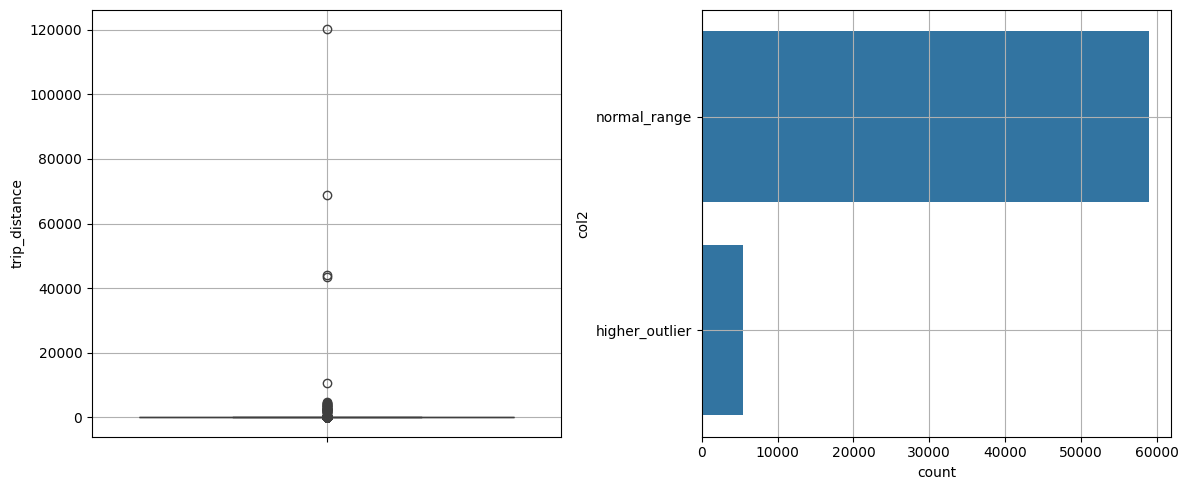

minimum value per category : col2
higher_outlier    6.51
normal_range      0.01
Name: col1, dtype: float64

max value per category : col2
higher_outlier    120098.84
normal_range           6.50
Name: col1, dtype: float64


In [64]:
#Finding out outliers in trip_distance

test_df = df['trip_distance'].copy()

data = pd.DataFrame({'col1':test_df})

# data['col1'] = pd.DataFrame(data)
# data['col1'] = data.to_frame()

Q1 = data['col1'].quantile(0.25)
Q3 = data['col1'].quantile(0.75)
IQR = Q3-Q1
lo_outlier_limit = Q1 - (1.5 * IQR)
hi_outlier_limit = Q3 + (1.5 * IQR)

data['col2'] = data['col1'].apply(lambda x: 'lower_outlier' if x < lo_outlier_limit else 'normal_range' if ((x>=lo_outlier_limit) & (x<=hi_outlier_limit)) else 'higher_outlier' if x > hi_outlier_limit else '' )

# Subplot
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=False)  # Adjust the height as needed

# grid 1
sns.boxplot(test_df, ax=ax[0])
ax[0].grid()
# grid 2
sns.countplot(data=data['col2'], ax=ax[1])
ax[1].grid()
plt.tight_layout()
plt.show()


print(f'minimum value per category : {data.groupby('col2')['col1'].min()}')
print()
print(f'max value per category : {data.groupby('col2')['col1'].max()}')

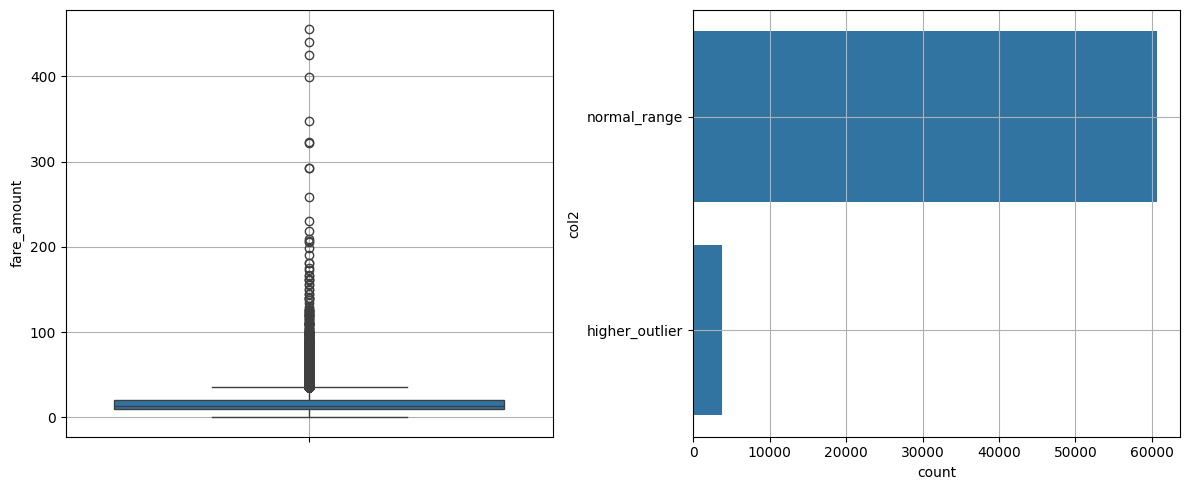

minimum value per category : col2
higher_outlier    35.56
normal_range       0.00
Name: col1, dtype: float64

max value per category : col2
higher_outlier    455.00
normal_range       35.55
Name: col1, dtype: float64


In [65]:
#Finding out outliers in fare_amount

test_df = df['fare_amount'].copy()

data = pd.DataFrame({'col1':test_df})

# data['col1'] = pd.DataFrame(data)
# data['col1'] = data.to_frame()

Q1 = data['col1'].quantile(0.25)
Q3 = data['col1'].quantile(0.75)
IQR = Q3-Q1
lo_outlier_limit = Q1 - (1.5 * IQR)
hi_outlier_limit = Q3 + (1.5 * IQR)

data['col2'] = data['col1'].apply(lambda x: 'lower_outlier' if x < lo_outlier_limit else 'normal_range' if ((x>=lo_outlier_limit) & (x<=hi_outlier_limit)) else 'higher_outlier' if x > hi_outlier_limit else '' )

# Subplot
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=False)  # Adjust the height as needed

# grid 1
sns.boxplot(test_df, ax=ax[0])
ax[0].grid()
# grid 2
sns.countplot(data=data['col2'], ax=ax[1])
ax[1].grid()
plt.tight_layout()
plt.show()


print(f'minimum value per category : {data.groupby('col2')['col1'].min()}')
print()
print(f'max value per category : {data.groupby('col2')['col1'].max()}')

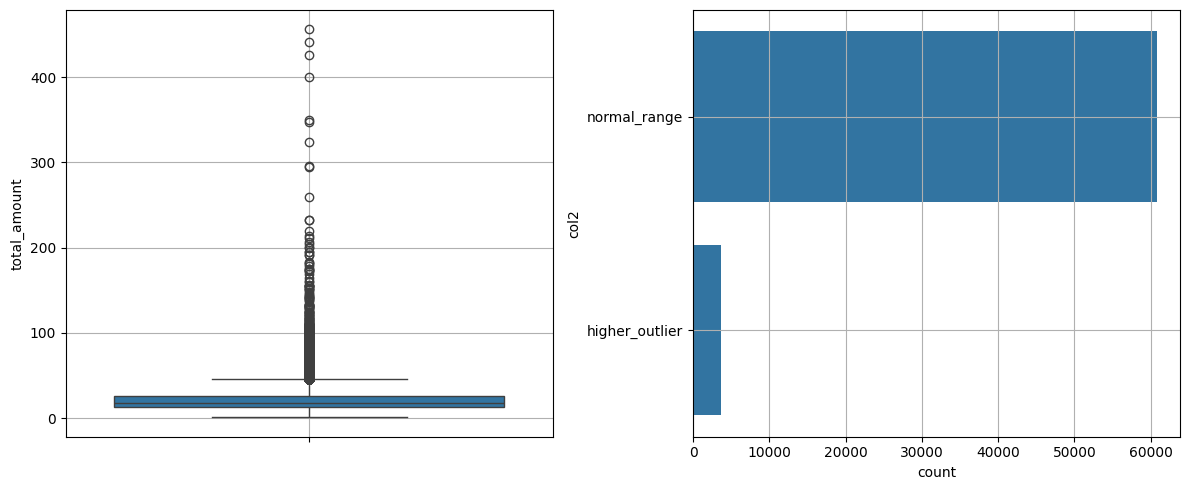

minimum value per category : col2
higher_outlier    45.95
normal_range       1.01
Name: col1, dtype: float64

max value per category : col2
higher_outlier    456.00
normal_range       45.91
Name: col1, dtype: float64


In [66]:
#Finding out outliers in total_amount

test_df = df['total_amount'].copy()

data = pd.DataFrame({'col1':test_df})

# data['col1'] = pd.DataFrame(data)
# data['col1'] = data.to_frame()

Q1 = data['col1'].quantile(0.25)
Q3 = data['col1'].quantile(0.75)
IQR = Q3-Q1
lo_outlier_limit = Q1 - (1.5 * IQR)
hi_outlier_limit = Q3 + (1.5 * IQR)

data['col2'] = data['col1'].apply(lambda x: 'lower_outlier' if x < lo_outlier_limit else 'normal_range' if ((x>=lo_outlier_limit) & (x<=hi_outlier_limit)) else 'higher_outlier' if x > hi_outlier_limit else '' )

# Subplot
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=False)  # Adjust the height as needed

# grid 1
sns.boxplot(test_df, ax=ax[0])
ax[0].grid()
# grid 2
sns.countplot(data=data['col2'], ax=ax[1])
ax[1].grid()
plt.tight_layout()
plt.show()


print(f'minimum value per category : {data.groupby('col2')['col1'].min()}')
print()
print(f'max value per category : {data.groupby('col2')['col1'].max()}')

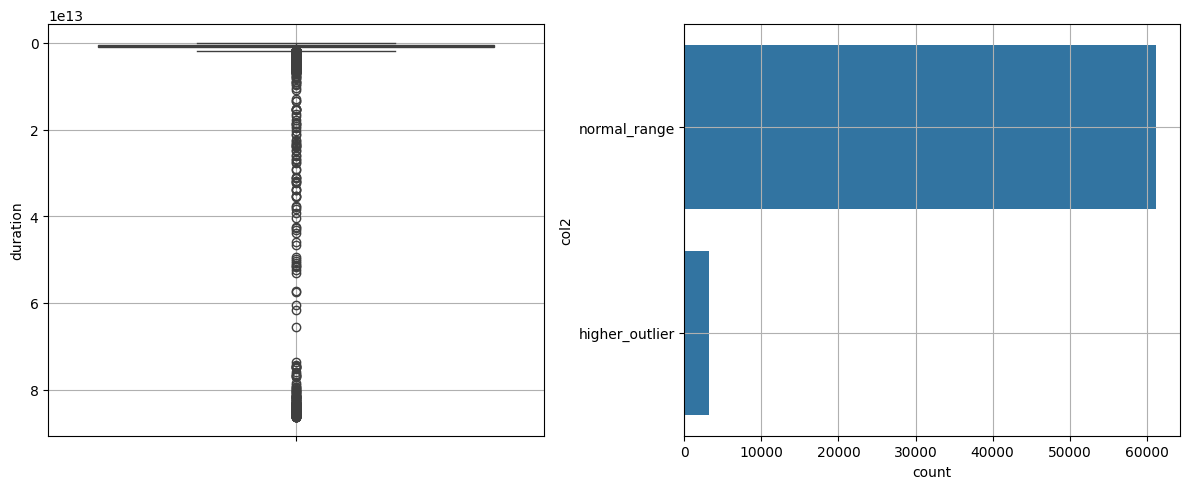

minimum value per category : col2
higher_outlier   0 days 00:32:14
normal_range     0 days 00:00:02
Name: col1, dtype: timedelta64[ns]

max value per category : col2
higher_outlier   0 days 23:58:56
normal_range     0 days 00:32:13
Name: col1, dtype: timedelta64[ns]


In [67]:
#Finding out outliers in duration column

test_df = df['duration'].copy()

data = pd.DataFrame({'col1':test_df})

# data['col1'] = pd.DataFrame(data)
# data['col1'] = data.to_frame()

Q1 = data['col1'].quantile(0.25)
Q3 = data['col1'].quantile(0.75)
IQR = Q3-Q1
lo_outlier_limit = Q1 - (1.5 * IQR)
hi_outlier_limit = Q3 + (1.5 * IQR)

data['col2'] = data['col1'].apply(lambda x: 'lower_outlier' if x < lo_outlier_limit else 'normal_range' if ((x>=lo_outlier_limit) & (x<=hi_outlier_limit)) else 'higher_outlier' if x > hi_outlier_limit else '' )

# Subplot
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=False)  # Adjust the height as needed

# grid 1
sns.boxplot(test_df, ax=ax[0])
ax[0].grid()
# grid 2
sns.countplot(data=data['col2'], ax=ax[1])
ax[1].grid()
plt.tight_layout()
plt.show()


print(f'minimum value per category : {data.groupby('col2')['col1'].min()}')
print()
print(f'max value per category : {data.groupby('col2')['col1'].max()}')

In [68]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_week,hour,duration
count,64460.000000,64460,64460,64460.000000,64460.000000,64460.000000,60294.000000,64460.000000,64460.000000,64460.000000,...,64460.000000,0.0,64460.000000,64460.000000,64460.000000,64460.000000,64460.000000,64460.000000,64460.000000,64460
mean,1.881756,2023-01-16 20:43:25.939078656,2023-01-16 21:01:36.542817024,1.079134,97.468011,138.403010,1.330398,8.578908,16.501217,0.856849,...,0.156898,NaN,0.957524,21.814244,1.339001,1.013016,0.713121,2.851086,13.869299,0 days 00:18:10.603738752
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.000000,1.000000,1.000000,0.010000,0.000000,0.000000,...,0.000000,NaN,0.000000,1.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:02
25%,2.000000,2023-01-09 12:32:05.500000,2023-01-09 12:44:37,1.000000,74.000000,74.000000,1.000000,1.230000,9.300000,0.000000,...,0.000000,NaN,1.000000,12.960000,1.000000,1.000000,0.000000,1.000000,10.000000,0 days 00:07:26
50%,2.000000,2023-01-17 09:18:31,2023-01-17 09:35:35,1.000000,75.000000,138.000000,1.000000,1.940000,13.380000,0.000000,...,0.000000,NaN,1.000000,17.940000,1.000000,1.000000,0.000000,3.000000,15.000000,0 days 00:11:29
75%,2.000000,2023-01-24 16:06:26,2023-01-24 16:22:24.500000,1.000000,116.000000,220.000000,1.000000,3.340000,19.800000,1.000000,...,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000,4.000000,18.000000,0 days 00:17:21
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,8.000000,120098.840000,455.000000,12.500000,...,36.050000,NaN,1.000000,456.000000,2.000000,2.000000,2.750000,6.000000,23.000000,0 days 23:58:56
std,0.322899,NaN,NaN,1.315196,60.067828,76.504965,0.989581,601.886189,12.428176,1.281101,...,1.051656,NaN,0.168010,14.556172,0.473374,0.113343,1.205159,1.961424,5.211787,0 days 01:15:35.105570363


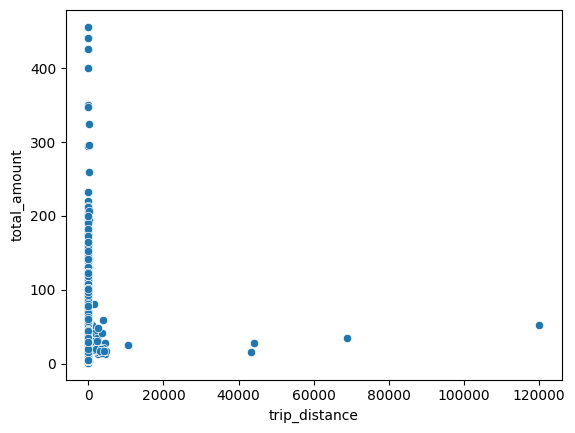

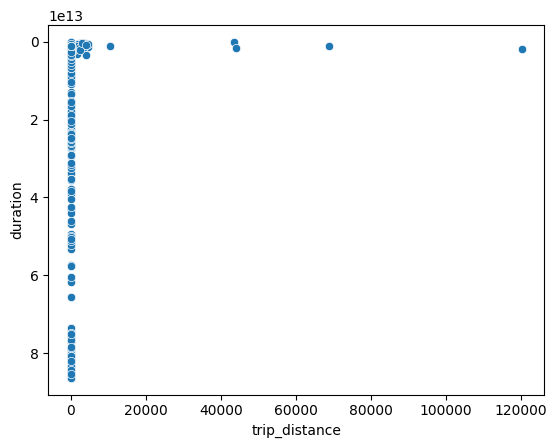

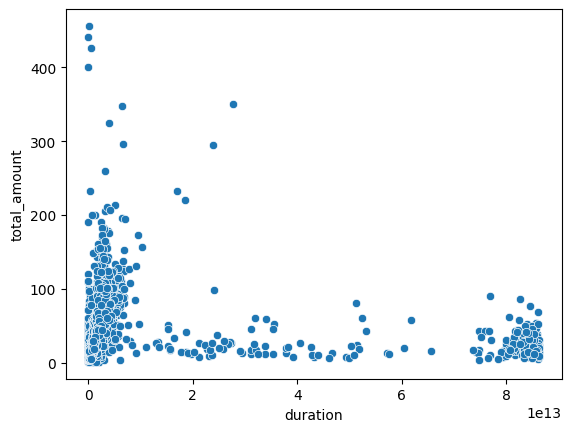

In [69]:
# Visualizing relationships of different columns

sns.scatterplot(df,y='total_amount', x='trip_distance')
plt.show()

sns.scatterplot(df,y='duration', x='trip_distance')
plt.show()

sns.scatterplot(df,y='total_amount', x='duration')
plt.show()

In [70]:
df[['trip_distance', 'duration', 'total_amount', 'hour']].sort_values('trip_distance',ascending=False).head(10)

,trip_distance,duration,total_amount,hour
65194,120098.84,0 days 00:30:00,52.57,6
67926,68796.82,0 days 00:18:00,34.38,18
66581,44003.31,0 days 00:25:00,27.13,9
64609,43392.12,0 days 00:03:00,15.62,7
65846,10480.36,0 days 00:18:00,25.21,5
67415,4707.37,0 days 00:11:00,17.35,6
66713,4502.86,0 days 00:22:00,27.68,8
66452,4389.24,0 days 00:15:00,13.30,17
68206,4070.82,0 days 00:13:00,16.70,22
66842,3981.90,0 days 00:13:00,20.75,1


#### Eliminating Outliers

In [71]:
df[['trip_distance', 'duration', 'total_amount', 'fare_amount', 'tip_amount', 'hour']].sort_values('total_amount',ascending=False).head(50)

,trip_distance,duration,total_amount,fare_amount,tip_amount,hour
59442,0.07,0 days 00:03:27,456.00,455.00,0.00,20
18474,0.38,0 days 00:00:11,441.00,440.00,0.00,15
50526,0.60,0 days 00:07:27,426.00,425.00,0.00,17
61656,0.02,0 days 00:00:13,400.00,399.00,0.00,22
7731,25.48,0 days 07:41:00,349.60,348.10,0.00,12
25518,38.24,0 days 01:45:55,347.00,322.20,0.00,16
44927,47.25,0 days 01:05:46,324.40,322.90,0.00,10
50437,46.29,0 days 01:52:14,296.10,292.10,0.00,17
556,16.00,0 days 06:37:32,294.30,292.80,0.00,13
62314,48.19,0 days 00:53:08,260.00,258.50,0.00,11


In [72]:
df_new = df.copy()

##### Eliminating distance under 1  mile & fare amount over 18

In [73]:
df_new[df_new['trip_distance']<1][['duration', 'total_amount']].describe()

,duration,total_amount
count,10443,10443.000000
mean,0 days 00:09:18.851766733,11.129004
std,0 days 01:12:12.722692835,10.474385
min,0 days 00:00:02,1.300000
25%,0 days 00:03:29,8.300000
50%,0 days 00:04:48,10.000000
75%,0 days 00:06:20,12.120000
max,0 days 23:58:55,456.000000


In [74]:
Q1 = df_new[df_new['trip_distance']<1]['total_amount'].quantile(0.25)
Q3 = df_new[df_new['trip_distance']<1]['total_amount'].quantile(0.75)
IQR = Q3-Q1
lo_outlier_limit = Q1 - (1.5 * IQR)
hi_outlier_limit = Q3 + (1.5 * IQR)

print(f'High outlier limit : {hi_outlier_limit}')

High outlier limit : 17.849999999999998


In [75]:
df_new = df_new[ ( (df_new['trip_distance']<1) & (df_new['total_amount']<18) ) | (df_new['trip_distance']>=1) ]
df_new.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_week,day_type,hour,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,NaN,1.0,24.18,1.0,1.0,2.75,6,weekend,0,0 days 00:11:01
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,NaN,1.0,15.84,1.0,1.0,0.00,6,weekend,0,0 days 00:06:46
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,NaN,1.0,10.20,1.0,1.0,0.00,6,weekend,0,0 days 00:05:49
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,NaN,1.0,8.00,1.0,1.0,0.00,6,weekend,0,0 days 00:05:58
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,NaN,1.0,22.95,2.0,1.0,2.75,6,weekend,0,0 days 00:17:33


In [76]:
df_new[['trip_distance', 'duration', 'total_amount', 'fare_amount', 'tip_amount', 'hour']].sort_values('total_amount',ascending=False).head(50)

,trip_distance,duration,total_amount,fare_amount,tip_amount,hour
7731,25.48,0 days 07:41:00,349.60,348.10,0.00,12
25518,38.24,0 days 01:45:55,347.00,322.20,0.00,16
44927,47.25,0 days 01:05:46,324.40,322.90,0.00,10
50437,46.29,0 days 01:52:14,296.10,292.10,0.00,17
556,16.00,0 days 06:37:32,294.30,292.80,0.00,13
62314,48.19,0 days 00:53:08,260.00,258.50,0.00,11
12615,20.43,0 days 04:43:00,232.00,230.50,0.00,15
2014,2.35,0 days 05:08:00,220.10,218.60,0.00,15
33098,36.40,0 days 01:23:48,213.70,206.70,3.00,16
42882,35.39,0 days 01:00:58,211.30,208.80,0.00,5


<Axes: xlabel='trip_distance', ylabel='total_amount'>

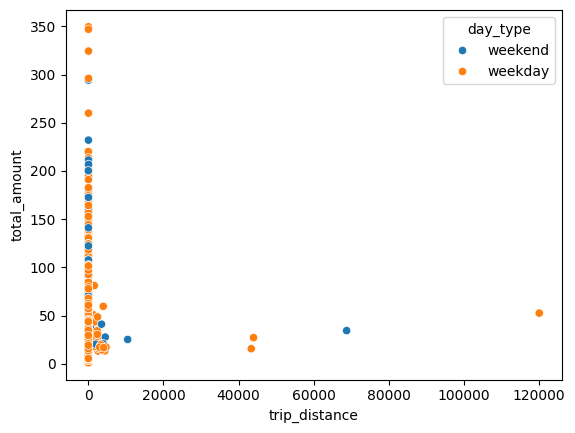

In [77]:
sns.scatterplot(df_new,y='total_amount', x='trip_distance', hue='day_type')

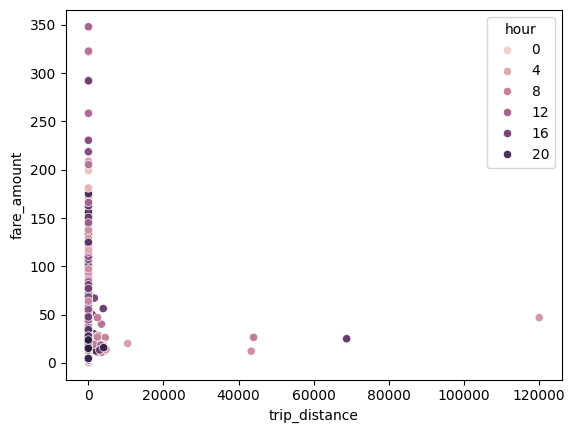

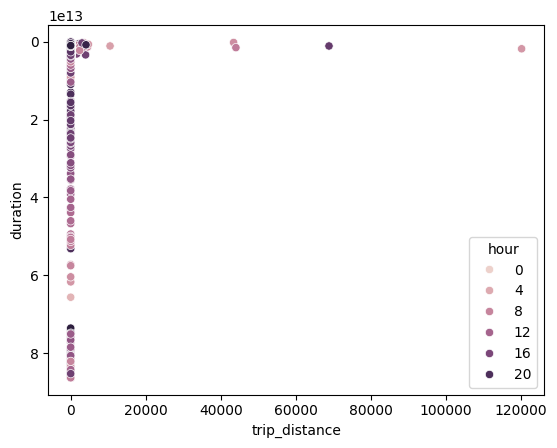

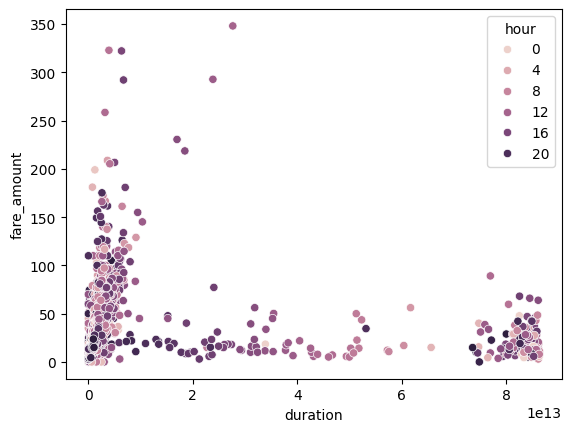

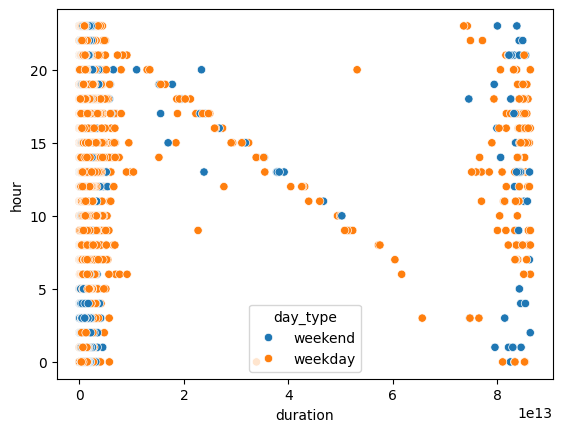

In [78]:
sns.scatterplot(df_new,y='fare_amount', x='trip_distance', hue='hour')
plt.show()

sns.scatterplot(df_new,y='duration', x='trip_distance', hue='hour')
plt.show()

sns.scatterplot(df_new,y='fare_amount', x='duration', hue='hour')
plt.show()

sns.scatterplot(df_new,y='hour', x='duration', hue='day_type')
plt.show()

In [79]:
Q1 = df_new['trip_distance'].quantile(0.25)
Q3 = df_new['trip_distance'].quantile(0.75)
IQR = Q3-Q1
lo_outlier_limit = Q1 - (1.5 * IQR)
hi_outlier_limit = Q3 + (1.5 * IQR)

print(f'High outlier limit : {hi_outlier_limit}')
df_new['trip_distance'].describe()

High outlier limit : 6.54


count     64097.000000
mean          8.625131
std         603.587823
min           0.010000
25%           1.240000
50%           1.950000
75%           3.360000
max      120098.840000
Name: trip_distance, dtype: float64

##### Re-checking new trip distance limit

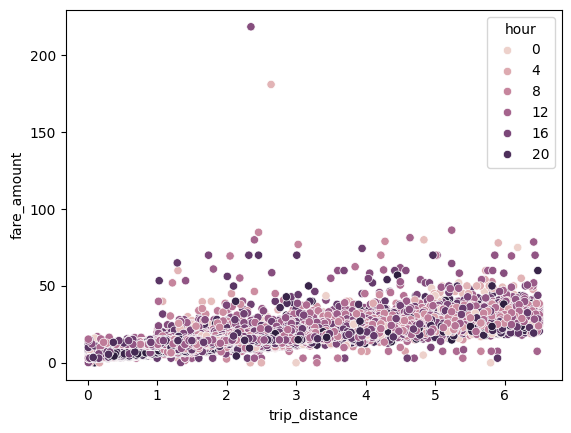

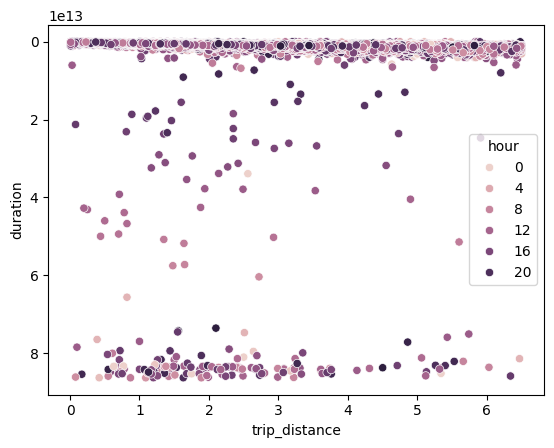

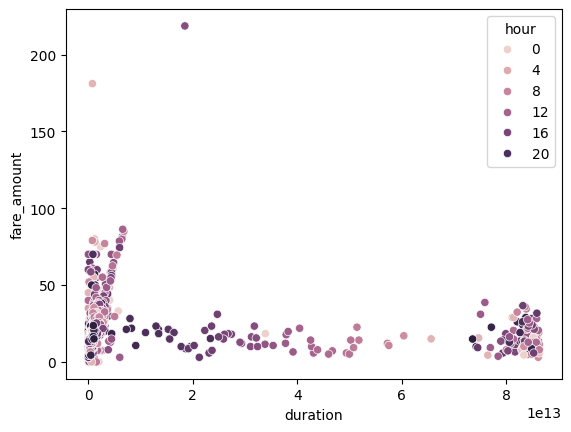

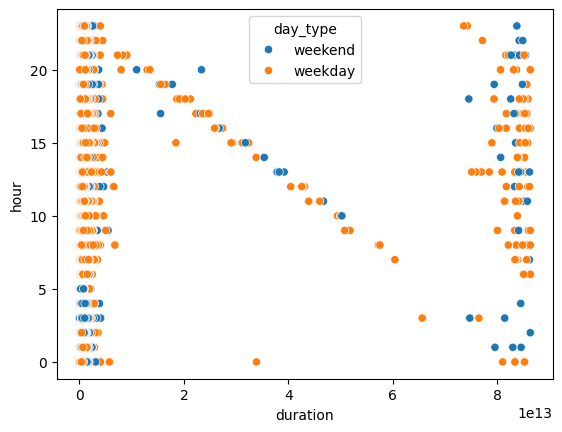

In [80]:
df_new_1 = df_new[df_new['trip_distance']<=6.5].copy()

sns.scatterplot(df_new_1,y='fare_amount', x='trip_distance', hue='hour')
plt.show()

sns.scatterplot(df_new_1,y='duration', x='trip_distance', hue='hour')
plt.show()

sns.scatterplot(df_new_1,y='fare_amount', x='duration', hue='hour')
plt.show()

sns.scatterplot(df_new_1,y='hour', x='duration', hue='day_type')
plt.show()

##### Re-checking duration and eliminating further outlier

In [81]:
Q1 = df_new_1['duration'].quantile(0.25)
Q3 = df_new_1['duration'].quantile(0.75)
IQR = Q3-Q1
lo_outlier_limit = Q1 - (1.5 * IQR)
hi_outlier_limit = Q3 + (1.5 * IQR)

print(f'High outlier limit : {hi_outlier_limit} in timedelta')

print(f'High outlier limit : {hi_outlier_limit.total_seconds()} in seconds')

High outlier limit : 0 days 00:28:10.500000 in timedelta
High outlier limit : 1690.5 in seconds


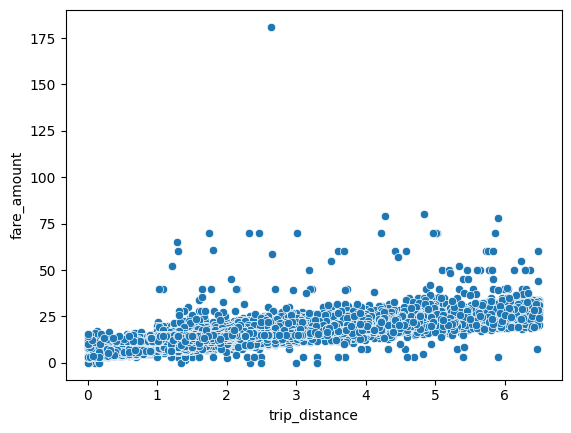

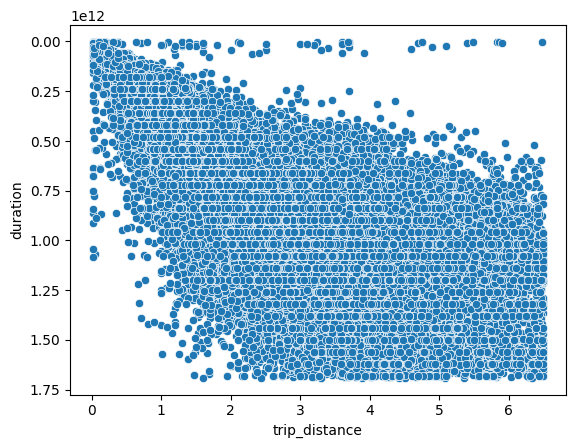

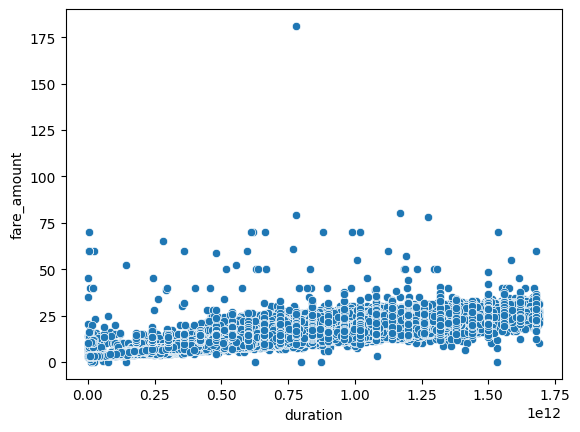

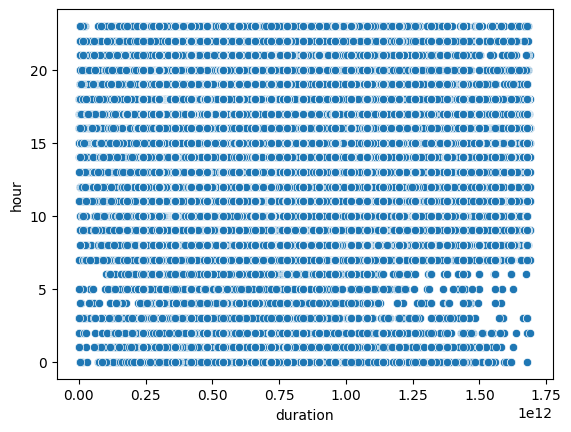

In [82]:
df_new_2 = df_new_1[ df_new_1['duration'] <= pd.Timedelta(seconds=1691) ].copy()

sns.scatterplot(df_new_2,y='fare_amount', x='trip_distance')
plt.show()

sns.scatterplot(df_new_2,y='duration', x='trip_distance')
plt.show()

sns.scatterplot(df_new_2,y='fare_amount', x='duration')
plt.show()

sns.scatterplot(df_new_2,y='hour', x='duration')
plt.show()

In [83]:
df_new_2.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_week,hour,duration
count,56508.000000,56508,56508,56508.000000,56508.000000,56508.000000,53626.000000,56508.000000,56508.000000,56508.000000,...,56508.000000,0.0,56508.000000,56508.000000,56508.000000,56508.000000,56508.000000,56508.000000,56508.000000,56508
mean,1.878672,2023-01-16 22:37:29.317211648,2023-01-16 22:48:52.295497984,1.043516,95.548206,137.624956,1.327192,2.094990,13.327871,0.850035,...,0.034528,NaN,0.957815,18.137492,1.342359,1.008866,0.678930,2.851720,13.991630,0 days 00:11:22.978286260
min,1.000000,2022-12-09 14:10:49,2022-12-09 14:22:26,1.000000,3.000000,3.000000,1.000000,0.010000,0.000000,0.000000,...,0.000000,NaN,0.000000,1.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:02
25%,2.000000,2023-01-09 12:32:36.500000,2023-01-09 12:40:22.750000128,1.000000,74.000000,74.000000,1.000000,1.170000,8.600000,0.000000,...,0.000000,NaN,1.000000,12.500000,1.000000,1.000000,0.000000,1.000000,10.000000,0 days 00:07:01
50%,2.000000,2023-01-17 09:14:10,2023-01-17 09:24:28.500000,1.000000,75.000000,138.000000,1.000000,1.760000,12.100000,0.000000,...,0.000000,NaN,1.000000,16.650000,1.000000,1.000000,0.000000,3.000000,15.000000,0 days 00:10:29
75%,2.000000,2023-01-24 15:46:25.750000128,2023-01-24 15:59:10,1.000000,97.000000,223.000000,1.000000,2.710000,17.000000,1.000000,...,0.000000,NaN,1.000000,22.650000,2.000000,1.000000,0.000000,4.000000,18.000000,0 days 00:14:53
max,2.000000,2023-01-31 23:58:23,2023-02-01 00:07:16,99.000000,265.000000,265.000000,8.000000,6.500000,181.070000,12.500000,...,13.750000,NaN,1.000000,200.280000,2.000000,2.000000,2.750000,6.000000,23.000000,0 days 00:28:11
std,0.326511,NaN,NaN,0.705409,58.053624,77.147206,0.991367,1.288216,5.957303,1.250762,...,0.471370,NaN,0.167380,7.650849,0.474503,0.093742,1.185751,1.964065,5.168838,0 days 00:05:44.529860775


In [84]:
type(df_new_2['total_amount'].dtypes)

numpy.dtypes.Float64DType

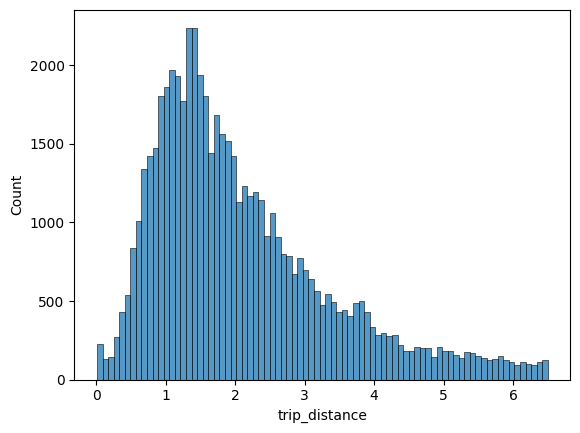

In [85]:
sns.histplot(data=df_new_2, x='trip_distance')
plt.show()

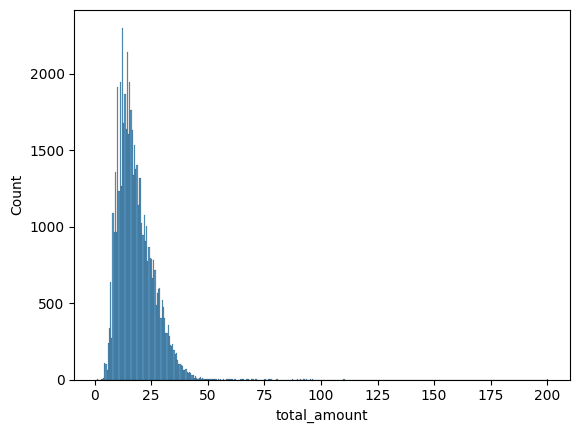

In [86]:
sns.histplot(data=df_new_2, x='total_amount')
plt.show()

##### Eliminating outlier in total amount

In [87]:
Q1 = df_new_2['total_amount'].quantile(0.25)
Q3 = df_new_2['total_amount'].quantile(0.75)
IQR = Q3-Q1
lo_outlier_limit = Q1 - (1.5 * IQR)
hi_outlier_limit = Q3 + (1.5 * IQR)

print(f'High outlier limit : {hi_outlier_limit}')

High outlier limit : 37.875


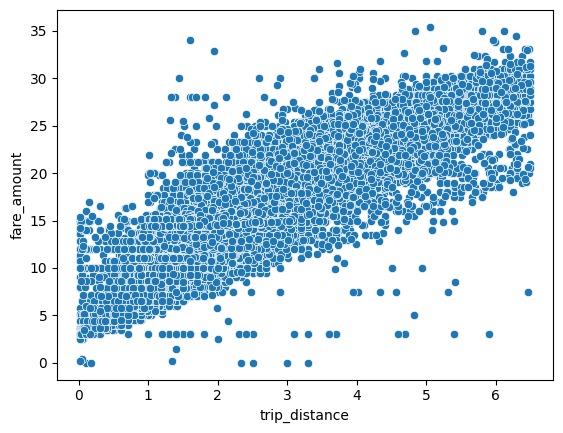

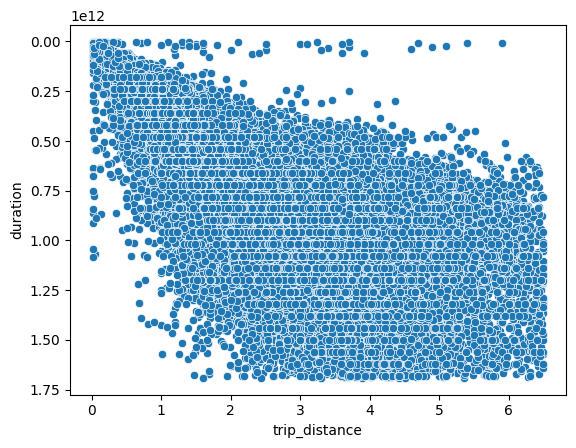

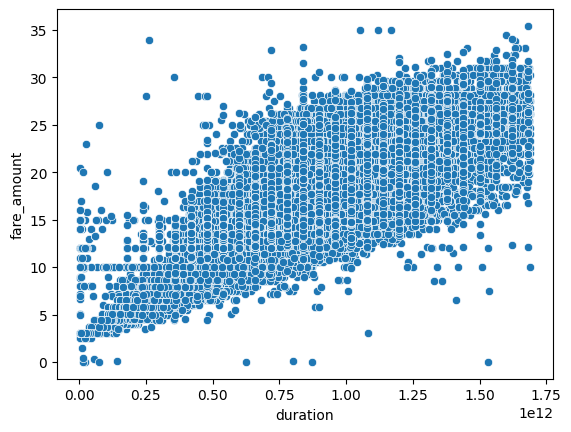

In [88]:
df_new_3 = df_new_2[ df_new_2['total_amount'] <= hi_outlier_limit ].copy()

sns.scatterplot(df_new_3,y='fare_amount', x='trip_distance')
plt.show()

sns.scatterplot(df_new_3,y='duration', x='trip_distance')
plt.show()

sns.scatterplot(df_new_3,y='fare_amount', x='duration')
plt.show()

##### Sanity check of total amount

In [89]:
df_new_3.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_week,hour,duration
count,55711.000000,55711,55711,55711.000000,55711.000000,55711.000000,52944.000000,55711.000000,55711.000000,55711.000000,...,55711.000000,0.0,55711.000000,55711.000000,55711.000000,55711.000000,55711.000000,55711.000000,55711.000000,55711
mean,1.878121,2023-01-16 22:30:12.570174464,2023-01-16 22:41:26.792877568,1.039095,95.203999,137.454488,1.324399,2.047418,13.077276,0.845358,...,0.022335,NaN,0.957685,17.776141,1.346520,1.007772,0.665098,2.850622,13.999138,0 days 00:11:14.222702877
min,1.000000,2022-12-09 14:10:49,2022-12-09 14:22:26,1.000000,3.000000,3.000000,1.000000,0.010000,0.000000,0.000000,...,0.000000,NaN,0.000000,1.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:02
25%,2.000000,2023-01-09 12:23:40.500000,2023-01-09 12:33:21.500000,1.000000,74.000000,74.000000,1.000000,1.160000,8.600000,0.000000,...,0.000000,NaN,1.000000,12.480000,1.000000,1.000000,0.000000,1.000000,10.000000,0 days 00:07:00
50%,2.000000,2023-01-17 09:02:02,2023-01-17 09:13:04,1.000000,75.000000,138.000000,1.000000,1.740000,12.100000,0.000000,...,0.000000,NaN,1.000000,16.400000,1.000000,1.000000,0.000000,3.000000,15.000000,0 days 00:10:23
75%,2.000000,2023-01-24 15:43:20,2023-01-24 15:57:03.500000,1.000000,97.000000,223.000000,1.000000,2.660000,16.300000,1.000000,...,0.000000,NaN,1.000000,22.250000,2.000000,1.000000,0.000000,4.000000,18.000000,0 days 00:14:39
max,2.000000,2023-01-31 23:58:23,2023-02-01 00:07:16,99.000000,265.000000,265.000000,8.000000,6.500000,35.440000,12.500000,...,6.550000,NaN,1.000000,37.850000,2.000000,2.000000,2.750000,6.000000,23.000000,0 days 00:28:11
std,0.327149,NaN,NaN,0.696645,57.642711,77.204732,0.987727,1.228580,5.497111,1.244380,...,0.372437,NaN,0.167565,6.972311,0.475866,0.087818,1.177520,1.964690,5.162695,0 days 00:05:36.862294872


In [90]:
df_new_3['fare_check'] = round(df_new_3['fare_amount']+ df_new_3['tip_amount'] + df_new_3['tolls_amount'] + df_new_3['mta_tax']  + df_new_3['improvement_surcharge'] + df_new_3['congestion_surcharge'],2)

df_new_3['amt_diff'] = df_new_3['fare_check'] - df_new_3['total_amount']

np.abs(df_new_3['amt_diff']).mean()

np.float64(0.8261752616179928)

In [91]:
wrong_amt = df_new_3[df_new_3['amt_diff']!=0]
correct_amt = df_new_3[df_new_3['amt_diff']==0]

In [92]:
wrong_amt.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_week,hour,duration,fare_check,amt_diff
count,26235.000000,26235,26235,26235.000000,26235.000000,26235.000000,25510.000000,26235.000000,26235.000000,26235.000000,...,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235.000000,26235,26235.000000,26235.000000
mean,1.773356,2023-01-17 06:05:03.847303168,2023-01-17 06:16:03.517133568,1.009529,96.757881,139.953421,1.305214,2.074874,12.807967,1.747065,...,0.963472,18.479001,1.334172,1.000191,0.642958,2.670059,15.815590,0 days 00:10:59.669830379,17.064515,-1.414486
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:13:26,1.000000,3.000000,3.000000,1.000000,0.010000,0.010000,0.000000,...,0.000000,1.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:02,2.010000,-12.500000
25%,2.000000,2023-01-09 18:54:56,2023-01-09 19:04:53,1.000000,74.000000,74.000000,1.000000,1.170000,8.600000,1.000000,...,1.000000,13.100000,1.000000,1.000000,0.000000,1.000000,15.000000,0 days 00:06:50,11.800000,-2.500000
50%,2.000000,2023-01-17 19:16:33,2023-01-17 19:27:27,1.000000,75.000000,138.000000,1.000000,1.760000,11.500000,1.000000,...,1.000000,17.160000,1.000000,1.000000,0.000000,3.000000,17.000000,0 days 00:10:07,15.750000,-1.000000
75%,2.000000,2023-01-24 23:33:43.500000,2023-01-24 23:39:06,1.000000,97.000000,223.000000,1.000000,2.710000,16.300000,2.500000,...,1.000000,23.060000,2.000000,1.000000,0.000000,4.000000,20.000000,0 days 00:14:16,21.450000,-1.000000
max,2.000000,2023-01-31 23:58:23,2023-02-01 00:07:16,99.000000,265.000000,265.000000,6.000000,6.500000,33.100000,12.500000,...,1.000000,37.850000,2.000000,2.000000,2.750000,6.000000,23.000000,0 days 00:28:11,38.850000,1.000000
std,0.418668,NaN,NaN,0.860331,58.114789,76.708642,0.920059,1.242929,5.426631,1.279979,...,0.155936,7.027858,0.471709,0.013804,1.163934,1.834213,5.787342,0 days 00:05:29.933842344,6.733436,1.461069


<Axes: xlabel='amt_diff', ylabel='Count'>

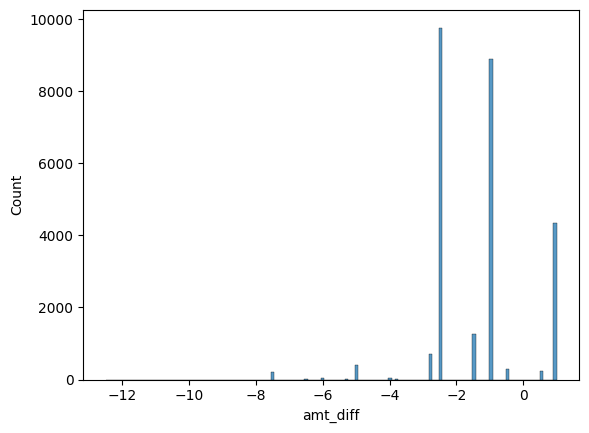

In [93]:
sns.histplot(wrong_amt, x='amt_diff')

In [94]:
wrong_amt[ wrong_amt['amt_diff'] > -4 ].describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_week,hour,duration,fare_check,amt_diff
count,25504.000000,25504,25504,25504.000000,25504.000000,25504.000000,24787.000000,25504.000000,25504.000000,25504.000000,...,25504.000000,25504.000000,25504.000000,25504.000000,25504.000000,25504.000000,25504.000000,25504,25504.000000,25504.000000
mean,1.768781,2023-01-17 06:19:21.031916544,2023-01-17 06:30:20.302423296,1.009175,96.159740,139.960202,1.302255,2.027884,12.661649,1.629539,...,0.962810,18.198815,1.336888,1.000039,0.661386,2.659700,15.867393,0 days 00:10:59.270506587,16.910643,-1.288172
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:13:26,1.000000,3.000000,3.000000,1.000000,0.010000,0.010000,0.000000,...,0.000000,1.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:02,2.010000,-3.750000
25%,2.000000,2023-01-09 18:49:13,2023-01-09 19:00:43,1.000000,74.000000,74.000000,1.000000,1.140000,8.600000,1.000000,...,1.000000,12.950000,1.000000,1.000000,0.000000,1.000000,15.000000,0 days 00:06:45,11.780000,-2.500000
50%,2.000000,2023-01-17 19:23:00,2023-01-17 19:31:15,1.000000,75.000000,140.000000,1.000000,1.710000,11.400000,1.000000,...,1.000000,16.800000,1.000000,1.000000,0.000000,3.000000,17.000000,0 days 00:10:03,15.680000,-1.000000
75%,2.000000,2023-01-24 23:55:43,2023-01-25 00:04:05.249999872,1.000000,97.000000,225.000000,1.000000,2.610000,15.600000,2.500000,...,1.000000,22.620000,2.000000,1.000000,0.000000,4.000000,20.000000,0 days 00:14:21,21.120000,-1.000000
max,2.000000,2023-01-31 23:58:23,2023-02-01 00:07:16,99.000000,265.000000,265.000000,6.000000,6.500000,33.100000,5.250000,...,1.000000,37.850000,2.000000,2.000000,2.750000,6.000000,23.000000,0 days 00:28:11,38.850000,1.000000
std,0.421620,NaN,NaN,0.871140,57.715718,77.764487,0.916851,1.222898,5.415607,1.071098,...,0.157268,6.892709,0.472656,0.006262,1.175324,1.836102,5.824424,0 days 00:05:33.403335282,6.737382,1.257605


In [95]:
correct_amt.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_week,hour,duration,fare_check,amt_diff
count,29476.000000,29476,29476,29476.000000,29476.000000,29476.000000,27434.000000,29476.000000,29476.000000,29476.000000,...,29476.000000,29476.000000,29476.000000,29476.000000,29476.000000,29476.000000,29476.000000,29476,29476.000000,29476.0
mean,1.971367,2023-01-16 15:45:22.074331648,2023-01-16 15:56:49.249762560,1.065409,93.820973,135.230323,1.342240,2.022981,13.316973,0.042798,...,0.952534,17.150564,1.357511,1.014520,0.684803,3.011331,12.382413,0 days 00:11:27.175430859,17.150564,0.0
min,1.000000,2022-12-09 14:10:49,2022-12-09 14:22:26,1.000000,3.000000,3.000000,1.000000,0.010000,0.000000,0.000000,...,0.000000,1.150000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:02,1.150000,0.0
25%,2.000000,2023-01-08 19:36:50.500000,2023-01-08 19:49:27,1.000000,74.000000,74.000000,1.000000,1.150000,9.300000,0.000000,...,1.000000,12.100000,1.000000,1.000000,0.000000,1.000000,9.000000,0 days 00:07:06,12.100000,0.0
50%,2.000000,2023-01-16 16:21:56.500000,2023-01-16 16:32:14,1.000000,75.000000,135.000000,1.000000,1.720000,12.100000,0.000000,...,1.000000,15.860000,1.000000,1.000000,0.000000,3.000000,12.000000,0 days 00:10:39,15.860000,0.0
75%,2.000000,2023-01-24 07:15:43.500000,2023-01-24 07:25:18.249999872,1.000000,97.000000,220.000000,1.000000,2.610000,16.400000,0.000000,...,1.000000,21.320000,2.000000,1.000000,0.000000,5.000000,15.000000,0 days 00:15:00,21.320000,0.0
max,2.000000,2023-01-31 23:46:00,2023-02-01 00:02:00,5.000000,265.000000,265.000000,8.000000,6.500000,35.440000,3.750000,...,1.000000,37.850000,2.000000,2.000000,2.750000,6.000000,23.000000,0 days 00:28:11,37.850000,0.0
std,0.166777,NaN,NaN,0.506979,57.184745,77.577230,1.046433,1.215166,5.548196,0.317373,...,0.177119,6.862328,0.479275,0.119624,1.189155,2.060692,3.875026,0 days 00:05:42.396914538,6.862328,0.0


It is decided that only total amount discrepancies of above -4 will only be included within the further, and replacing the 'total_amount' to the actual amount stated in 'fare_check'

In [96]:
df_new_4 = df_new_3[ (df_new_3['amt_diff'] > -4) ].copy()
df_new_4['total_amount'] = df_new_4['fare_check']
df_new_4.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day_week,hour,duration,fare_check,amt_diff
count,54980.000000,54980,54980,54980.000000,54980.000000,54980.000000,52221.000000,54980.000000,54980.000000,54980.000000,...,54980.000000,54980.000000,54980.000000,54980.000000,54980.000000,54980.000000,54980.000000,54980,54980.000000,54980.000000
mean,1.877392,2023-01-16 22:30:47.341233152,2023-01-16 22:42:01.572189952,1.039323,94.905875,137.424409,1.323261,2.025256,13.012983,0.778851,...,0.957301,17.039270,1.347945,1.007803,0.673941,2.848218,13.999018,0 days 00:11:14.230956711,17.039270,-0.597555
min,1.000000,2022-12-09 14:10:49,2022-12-09 14:22:26,1.000000,3.000000,3.000000,1.000000,0.010000,0.000000,0.000000,...,0.000000,1.150000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:02,1.150000,-3.750000
25%,2.000000,2023-01-09 12:03:47.750000128,2023-01-09 12:14:46.249999872,1.000000,74.000000,74.000000,1.000000,1.150000,8.600000,0.000000,...,1.000000,11.800000,1.000000,1.000000,0.000000,1.000000,10.000000,0 days 00:06:57,11.800000,-1.000000
50%,2.000000,2023-01-17 09:05:32,2023-01-17 09:16:05.500000,1.000000,75.000000,139.000000,1.000000,1.720000,12.100000,0.000000,...,1.000000,15.700000,1.000000,1.000000,0.000000,3.000000,15.000000,0 days 00:10:22,15.700000,0.000000
75%,2.000000,2023-01-24 15:44:13,2023-01-24 15:57:22.500000,1.000000,97.000000,223.000000,1.000000,2.610000,16.300000,1.000000,...,1.000000,21.300000,2.000000,1.000000,0.000000,4.000000,18.000000,0 days 00:14:42,21.300000,0.000000
max,2.000000,2023-01-31 23:58:23,2023-02-01 00:07:16,99.000000,265.000000,265.000000,8.000000,6.500000,35.440000,5.250000,...,1.000000,38.850000,2.000000,2.000000,2.750000,6.000000,23.000000,0 days 00:28:11,38.850000,1.000000
std,0.327990,NaN,NaN,0.700432,57.442981,77.699256,0.987242,1.218750,5.496763,1.101062,...,0.168279,6.805644,0.476323,0.087989,1.182806,1.967526,5.177537,0 days 00:05:38.537807425,6.805644,1.070668


In [97]:
print( (df_new_4['total_amount'] == df_new_4['fare_check']).value_counts() )

True    54980
Name: count, dtype: int64


##### Eliminating tip amount of over $10

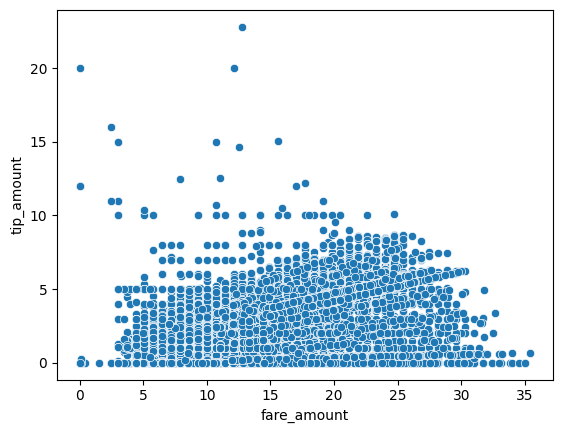

In [98]:
sns.scatterplot(df_new_4,y='tip_amount', x='fare_amount')
plt.show()

In [99]:
df_new_5 = df_new_4[ (df_new_4['tip_amount'] <= 10)  ].copy()

In [100]:
df_new_5['duration_sec'] = df_new_5['duration'].dt.seconds

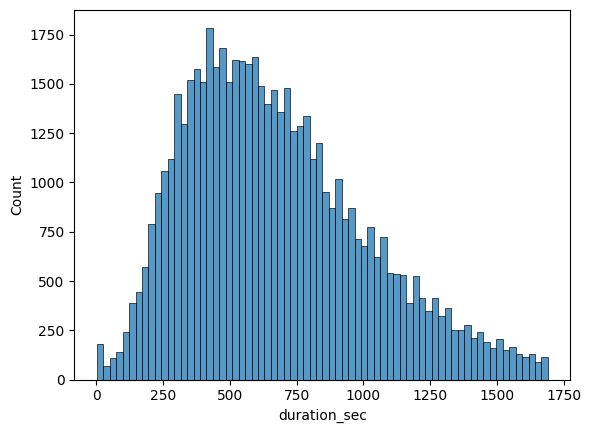

In [101]:
sns.histplot(df_new_5['duration_sec'])
plt.show()

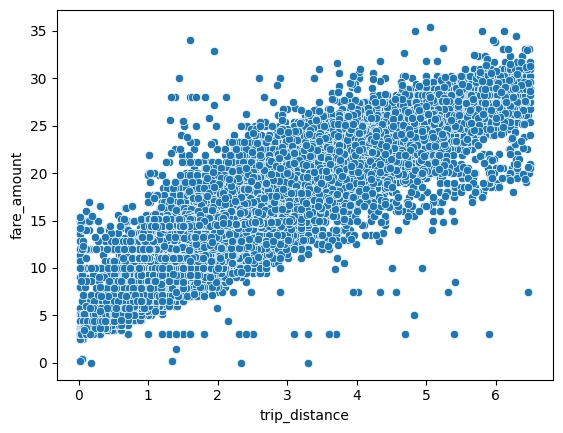

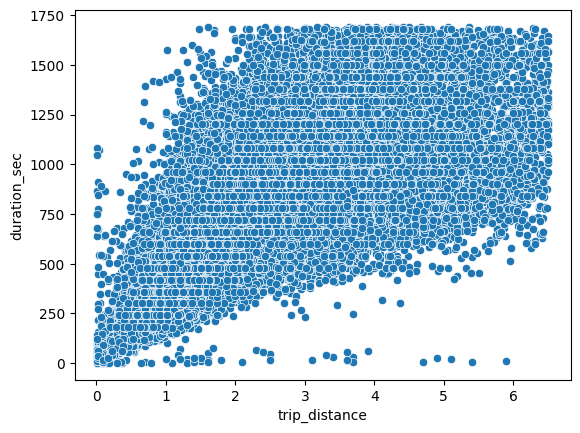

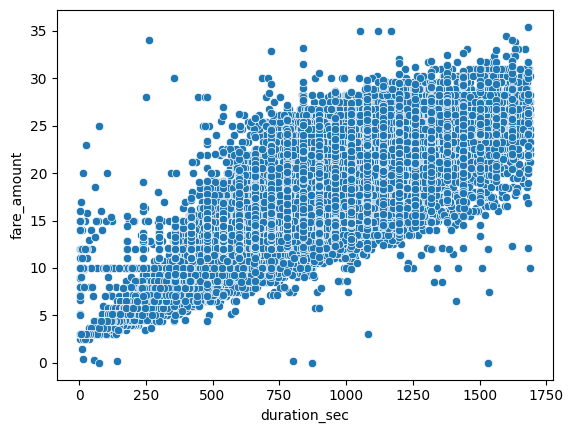

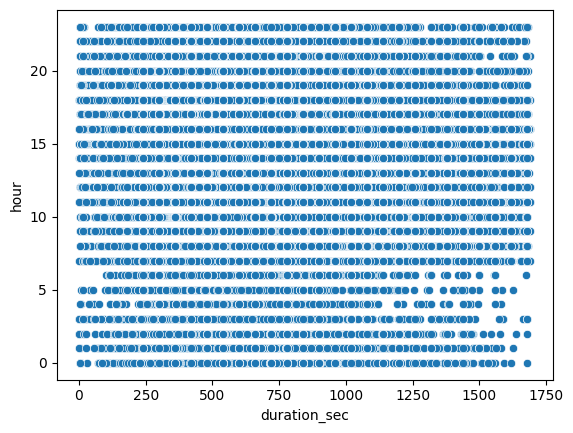

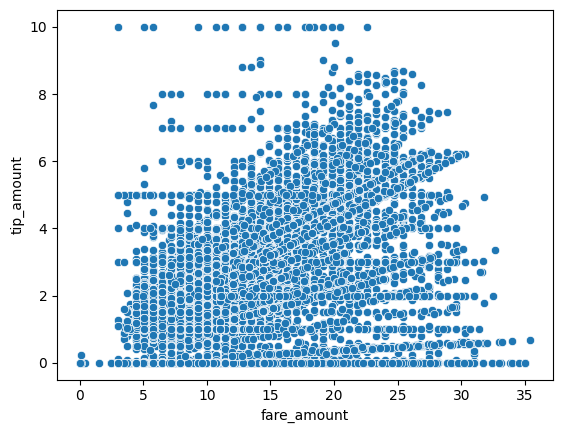

In [102]:
sns.scatterplot(df_new_5,y='fare_amount', x='trip_distance')
plt.show()

sns.scatterplot(df_new_5,y='duration_sec', x='trip_distance')
plt.show()

sns.scatterplot(df_new_5,y='fare_amount', x='duration_sec')
plt.show()

sns.scatterplot(df_new_5,y='hour', x='duration_sec')
plt.show()

sns.scatterplot(df_new_5,y='tip_amount', x='fare_amount')
plt.show()

##### Eliminating trips of more than NYC's 65 mph speed limit in freeway

<Axes: ylabel='mph'>

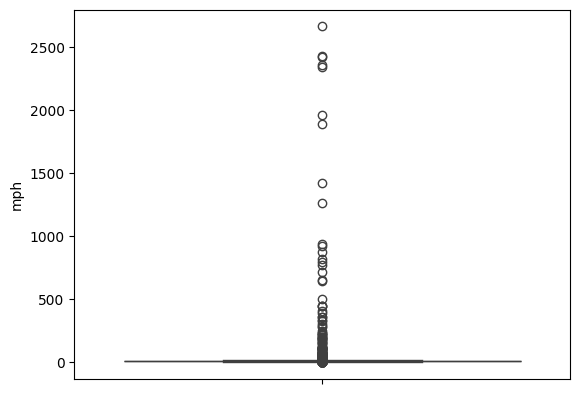

In [103]:
df_new_5['mph'] = df_new_5['trip_distance'] / df_new_5['duration_sec'] * 3600
sns.boxplot(df_new_5['mph'])

In [104]:
Q1 = df_new_5['mph'].quantile(0.25)
Q3 = df_new_5['mph'].quantile(0.75)
IQR = Q3-Q1
lo_outlier_limit = Q1 - (1.5 * IQR)
hi_outlier_limit = Q3 + (1.5 * IQR)

print(f'High outlier limit : {hi_outlier_limit}')

High outlier limit : 19.23114161976724


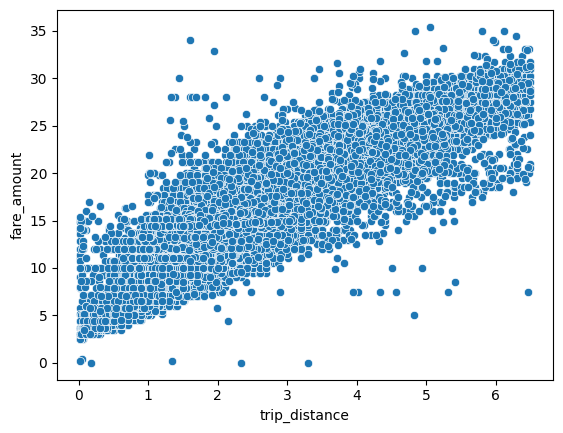

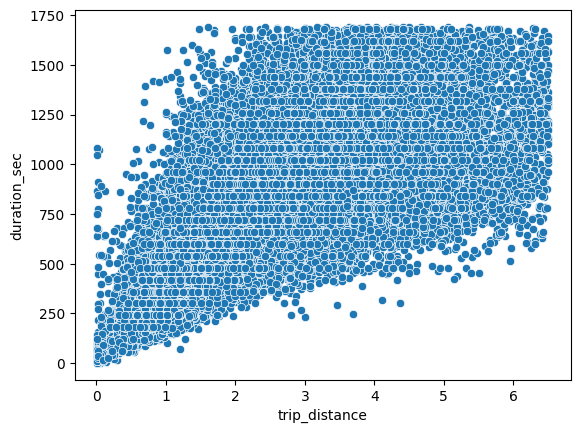

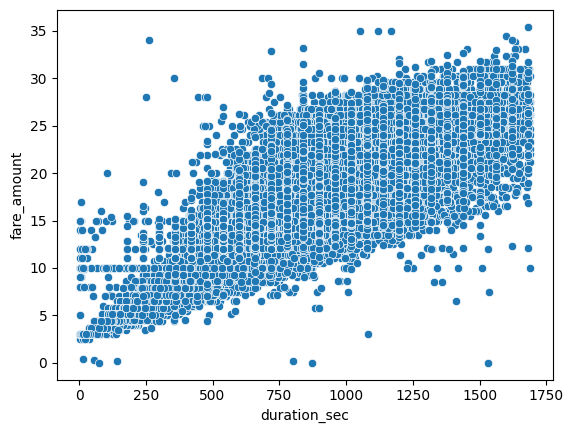

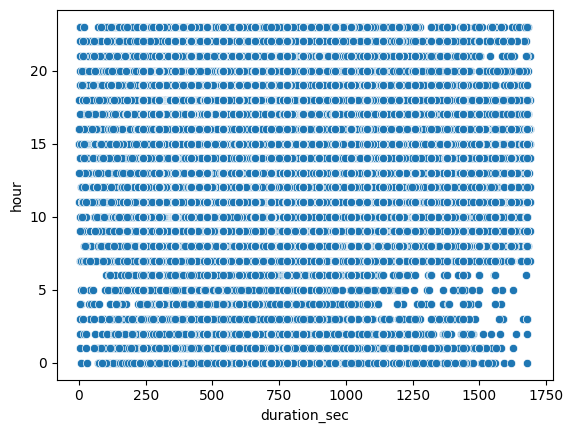

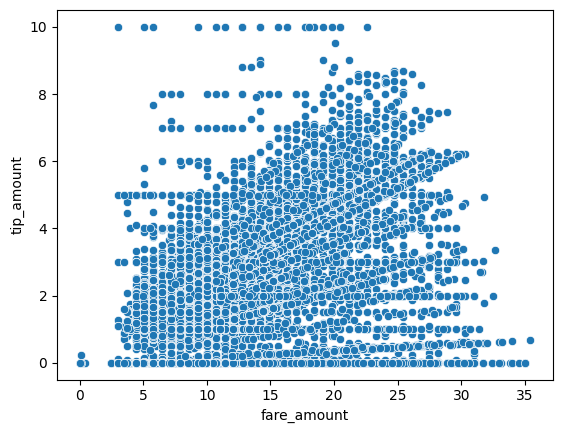

In [105]:
df_new_6 = df_new_5[ df_new_5['mph'] <= 65 ].copy()

sns.scatterplot(df_new_6,y='fare_amount', x='trip_distance')
plt.show()

sns.scatterplot(df_new_6,y='duration_sec', x='trip_distance')
plt.show()

sns.scatterplot(df_new_6,y='fare_amount', x='duration_sec')
plt.show()

sns.scatterplot(df_new_6,y='hour', x='duration_sec')
plt.show()

sns.scatterplot(df_new_6,y='tip_amount', x='fare_amount')
plt.show()

### Finalizing Dataframe

In [106]:
df_new_5.lpep_pickup_datetime.describe()

count                            54959
mean     2023-01-16 22:32:44.247166208
min                2022-12-09 14:10:49
25%         2023-01-09 12:06:36.500000
50%                2023-01-17 09:08:01
75%                2023-01-24 15:44:33
max                2023-01-31 23:58:23
Name: lpep_pickup_datetime, dtype: object

In [107]:
df_new_5=df_new_5[(df_new_5['lpep_pickup_datetime']>='2023-01-01') & (df_new_5['lpep_pickup_datetime']<'2023-02-01')]
# df_new_5.describe()

In [108]:
df_new_5.head()
df_new_5['date'] = df_new_5['lpep_pickup_datetime'].dt.date
df_new_5['day_name'] = df_new_5['lpep_pickup_datetime'].dt.day_name()

In [109]:
df_nyc = df_new_5.copy()

In [110]:
df_nyc.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,day_week,day_type,hour,duration,fare_check,amt_diff,duration_sec,mph,date,day_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,6,weekend,0,0 days 00:11:01,23.18,-1.0,661,14.051437,2023-01-01,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,6,weekend,0,0 days 00:06:46,14.84,-1.0,406,16.049261,2023-01-01,Sunday
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,6,weekend,0,0 days 00:05:49,10.70,0.5,349,13.409742,2023-01-01,Sunday
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,6,weekend,0,0 days 00:05:58,8.50,0.5,358,11.061453,2023-01-01,Sunday
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,6,weekend,0,0 days 00:17:33,21.95,-1.0,1053,9.504274,2023-01-01,Sunday


In [111]:
df_nyc.to_csv('df_nyc_capstone.csv')

## Analysis

In [112]:
# Setting up df_daily table 

df_nyc['date'] = df_nyc['lpep_pickup_datetime'].dt.day

df_daily = df_nyc[['date','trip_distance', 'total_amount', 'duration', 'day_week']]
df_daily = df_daily.groupby(['date', 'day_week']).agg(
    mean_trip_distance=('trip_distance', 'mean'),
    median_trip_distance=('trip_distance', 'median'),
    mean_total_amount=('total_amount', 'mean'),
    median_total_amount=('total_amount', 'median'),
    trip_count=('trip_distance', 'count')
).reset_index()
df_daily.head()

,date,day_week,mean_trip_distance,median_trip_distance,mean_total_amount,median_total_amount,trip_count
0,1,6,2.322028,2.05,17.545084,16.40,1129
1,2,0,2.154127,1.87,16.956120,15.80,1255
2,3,1,1.932446,1.64,16.625554,15.00,1705
3,4,2,1.997936,1.68,16.799263,15.65,1967
4,5,3,2.022235,1.70,16.990486,15.70,1915


##### Daily Revenue Trends

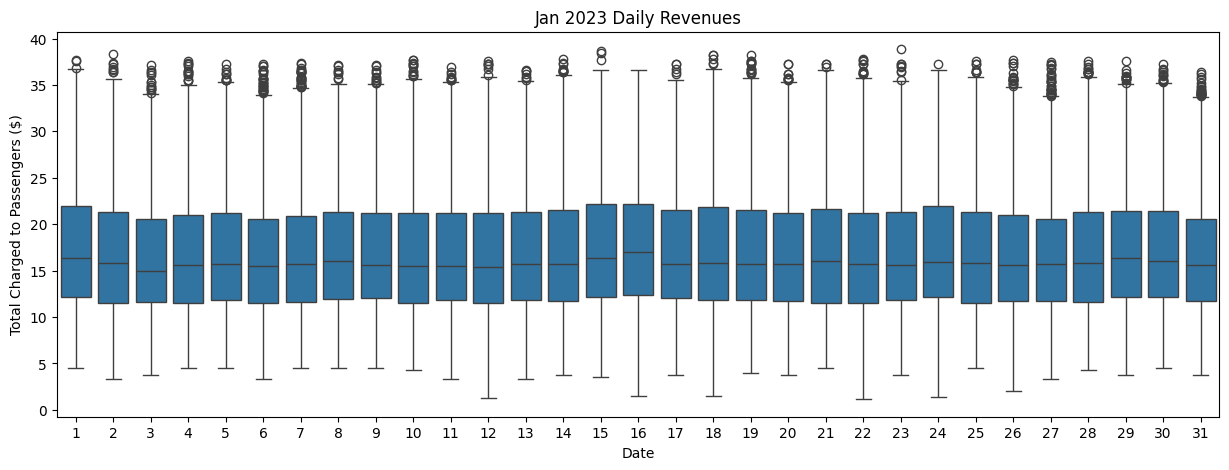

In [113]:
# Code & Viz : Jan 2023 Daily Revenue Trend

plt.figure(figsize=(15,5))
sns.boxplot(data=df_nyc, x='date', y='total_amount')
# Set labels and title
plt.ylabel('Total Charged to Passengers ($)')
plt.xlabel('Date')
plt.title('Jan 2023 Daily Revenues')
plt.show()

##### Takeaway
It is shown that therevenues/total amount charged per trips seemed to be pretty stable within January 2023, while there are few of outliers of longer trips being recorded on a daily basis.

##### Daily Trip Trends

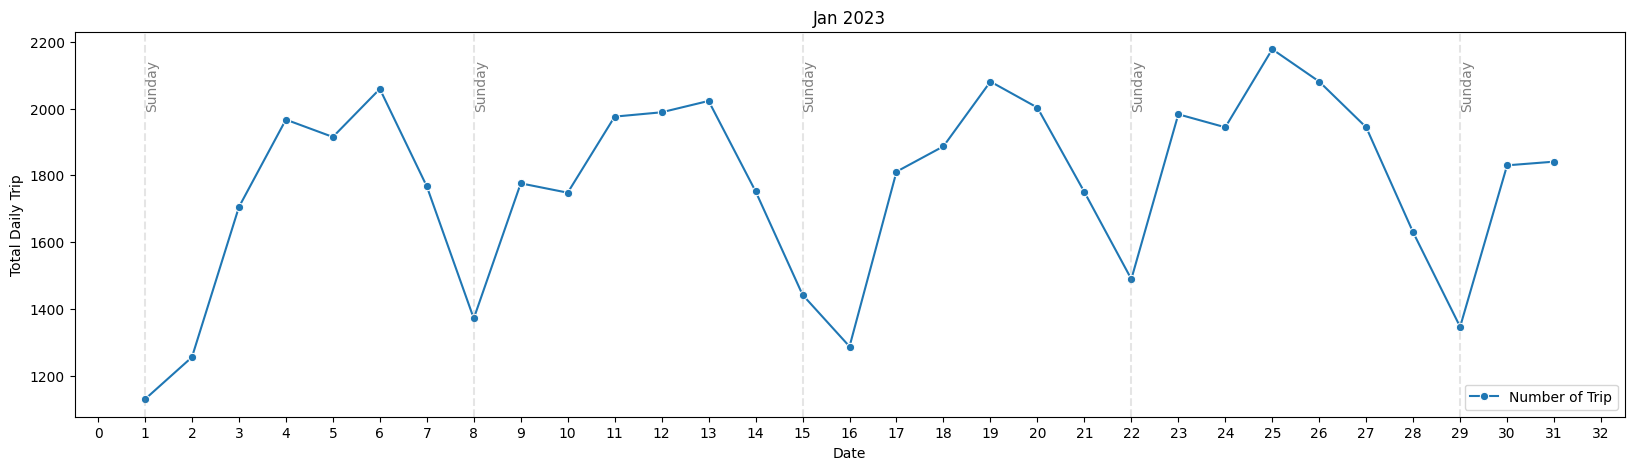

In [114]:
# Code & Viz : Jan 2023 Daily Trip Trend

plt.figure(figsize=(20,5))
ax = sns.lineplot(data=df_daily, x='date', y='trip_count', marker='o', label='Number of Trip')

# Set labels and title
plt.ylabel('Total Daily Trip')
plt.xlabel('Date')
plt.title('Jan 2023')

loc = plticker.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)

vlines = np.arange(1,31,7)
for x in vlines:
    plt.axvline(x=x, color='gray', linestyle='dashed', alpha=0.2, label='Sunday')
    plt.text(x, 2000, 'Sunday', color='gray', rotation=90)

plt.show()

##### Takeaway
Looking at the total daily trips, a weekly trend of trips volume can be seen that the end of the weekdays shown to have higher volume.

##### Customer Behavior : Average Trips by Day and Miles Taken

In [115]:
# Setting up daily trends table

df_nyc_dailytrends = df_nyc[['lpep_pickup_datetime', 'day_week', 'day_type', 'trip_distance', 'duration_sec', 'total_amount']].copy()
df_nyc_dailytrends['day_name'] = df_nyc_dailytrends['lpep_pickup_datetime'].dt.day_name()
df_nyc_dailytrends['date'] = df_nyc_dailytrends['lpep_pickup_datetime'].dt.date
df_nyc_dailytrends.head()

,lpep_pickup_datetime,day_week,day_type,trip_distance,duration_sec,total_amount,day_name,date
0,2023-01-01 00:26:10,6,weekend,2.58,661,23.18,Sunday,2023-01-01
1,2023-01-01 00:51:03,6,weekend,1.81,406,14.84,Sunday,2023-01-01
3,2023-01-01 00:13:14,6,weekend,1.30,349,10.70,Sunday,2023-01-01
4,2023-01-01 00:33:04,6,weekend,1.10,358,8.50,Sunday,2023-01-01
5,2023-01-01 00:53:31,6,weekend,2.78,1053,21.95,Sunday,2023-01-01


In [116]:
#Initial tables to gather average dailies

df_nyc_dayname_avgs = df_nyc_dailytrends.groupby(['date', 'day_name', 'day_week']).agg(
    trip_count=('trip_distance', 'count'),
    total_amount_daily=('total_amount', 'sum')
).reset_index()

df_nyc_dayname_avgs = df_nyc_dayname_avgs.groupby(['day_name', 'day_week']).agg(
    trip_avg=('trip_count', 'mean'),
    daily_avg_amt=('total_amount_daily', 'mean')
).sort_values('day_week', ascending=True).reset_index()

df_nyc_dt_dist = df_nyc_dailytrends.groupby(['day_name', 'day_week']).agg(
    mean_trip_distance=('trip_distance', 'mean')
).sort_values('day_week',ascending=True).reset_index()

df_nyc_dayname_avgs = pd.concat([df_nyc_dayname_avgs, df_nyc_dt_dist['mean_trip_distance']], axis=1)
df_nyc_dayname_avgs
df_nyc_dayname_avgs.to_csv('df_nyc_dayname_avgs.csv')

In [117]:
# Code : Daily Average Trips and Daily Average Miles

df_nyc_daily_trips = df_nyc_dailytrends.groupby(['date', 'day_name', 'day_week']).agg(
    trip_count=('trip_distance', 'count')
).reset_index()

df_nyc_day_avg_trips = df_nyc_daily_trips.groupby(['day_name', 'day_week']).agg(
    trip_avg=('trip_count', 'mean')
).sort_values('day_week', ascending=True).reset_index()

df_nyc_day_avg_trips

##

df_nyc_dt_dist = df_nyc_dailytrends.groupby(['day_name', 'day_week']).agg(
    mean_trip_distance=('trip_distance', 'mean')
).sort_values('day_week',ascending=True).reset_index()

df_nyc_dt_dist = pd.concat([df_nyc_dt_dist, df_nyc_day_avg_trips['trip_avg']], axis=1)

df_nyc_dt_dist

,day_name,day_week,mean_trip_distance,trip_avg
0,Monday,0,2.064523,1626.20
1,Tuesday,1,1.947920,1809.80
2,Wednesday,2,1.973568,2002.00
3,Thursday,3,1.952697,2016.50
4,Friday,4,1.974423,2007.25
5,Saturday,5,2.125793,1724.50
6,Sunday,6,2.185839,1355.40


Text(0.5, 1.0, 'Jan 2023 - Daily Average Trips and Daily Average Miles')

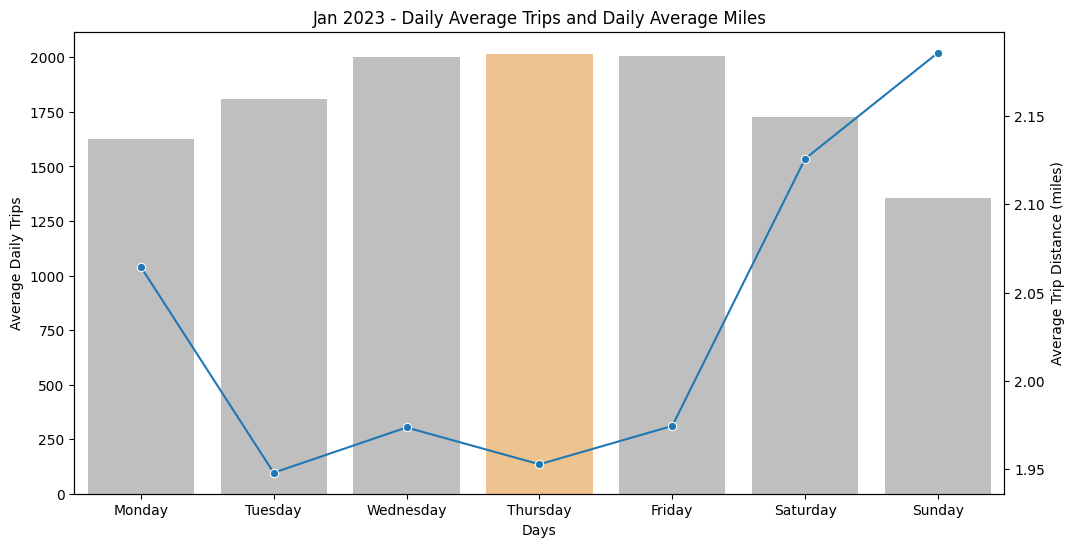

In [118]:
# Code & Viz : Daily Average Trips and Daily Average Miles

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))


ax2 = ax1.twinx()

sns.lineplot(data = df_nyc_dt_dist['mean_trip_distance'], marker='o', sort = True, ax=ax2)

clrs = ['grey' if (x < max(df_nyc_dt_dist['trip_avg'])) else 'darkorange' for x in df_nyc_dt_dist['trip_avg'] ]

sns.barplot(data = df_nyc_dt_dist, x='day_name', y='trip_avg', alpha=0.5, ax=ax1, palette=clrs)


ax1.set_ylabel('Average Daily Trips')
ax2.set_ylabel('Average Trip Distance (miles)')

# plt.ylabel('Avg Trip Distance')
ax1.set_xlabel('Days')
plt.title('Jan 2023 - Daily Average Trips and Daily Average Miles')

##### Takeaway
Taking a deeper dive into customer's behavior, the daily average trips in January 2023 confirmed the highest of trip volume being on Thursdays. While the trip distance (in miles) being lower compared to the weekends (Saturday and Sunday)

##### Customer Behavior : Average Trips by Day and Revenue

In [119]:
# Code : Daily Average Trips and Daily Average Revenue ($)

df_nyc_daily_trips = df_nyc_dailytrends.groupby(['date', 'day_name', 'day_week']).agg(
    total_amount_daily=('total_amount', 'sum')
).reset_index()

df_nyc_day_avg_tamt = df_nyc_daily_trips.groupby(['day_name', 'day_week']).agg(
    daily_avg_amt=('total_amount_daily', 'mean')
).sort_values('day_week', ascending=True).reset_index()

df_nyc_day_avg_tamt

######

# df_nyc_dt_amt = df_nyc_dailytrends.groupby(['day_name', 'day_week']).agg(
#     amt_daily_avg=('total_amount', 'mean')
# ).sort_values('day_week',ascending=True).reset_index()

df_nyc_dt_amt = pd.concat([df_nyc_day_avg_tamt, df_nyc_day_avg_trips['trip_avg']], axis=1)

df_nyc_dt_amt

,day_name,day_week,daily_avg_amt,trip_avg
0,Monday,0,27931.8100,1626.20
1,Tuesday,1,30667.5020,1809.80
2,Wednesday,2,34021.1150,2002.00
3,Thursday,3,34156.0875,2016.50
4,Friday,4,33851.2725,2007.25
5,Saturday,5,29566.2125,1724.50
6,Sunday,6,23378.4980,1355.40


Text(0.5, 1.0, 'Jan 2023 - Daily Average Trips and Daily Average Revenue ($)')

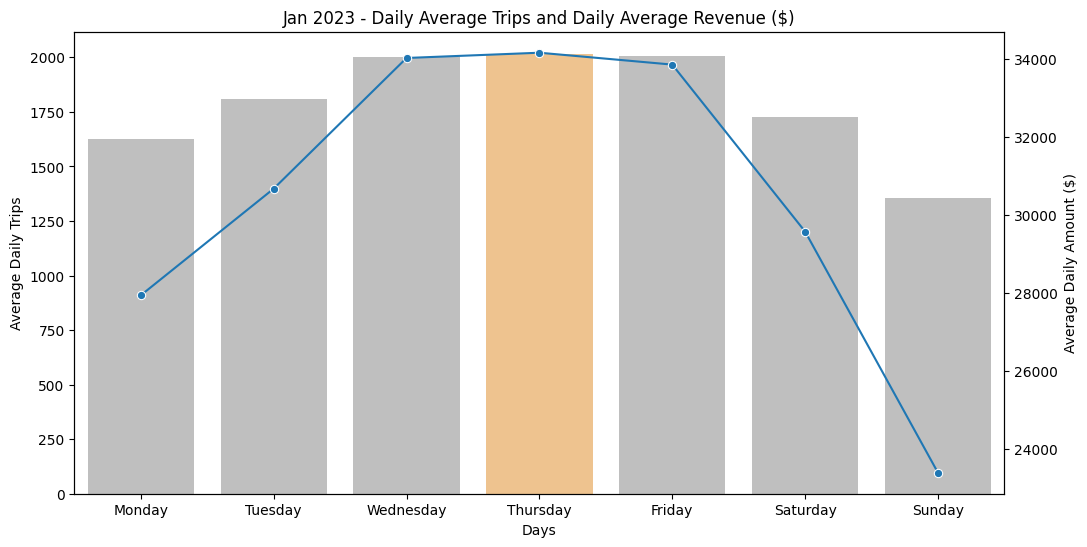

In [120]:
# Code & viz: Daily Average Trips and Daily Average Revenue ($)

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))


ax2 = ax1.twinx()

sns.lineplot(data = df_nyc_dt_amt['daily_avg_amt'], marker='o', sort = True, ax=ax2)

clrs = ['grey' if (x < max(df_nyc_dt_amt['trip_avg'])) else 'darkorange' for x in df_nyc_dt_amt['trip_avg'] ]

sns.barplot(data = df_nyc_dt_amt, x='day_name', y='trip_avg', alpha=0.5, ax=ax1, palette=clrs)


ax1.set_ylabel('Average Daily Trips')
ax2.set_ylabel('Average Daily Amount ($)')

# plt.ylabel('Avg Trip Distance')
ax1.set_xlabel('Days')
plt.title('Jan 2023 - Daily Average Trips and Daily Average Revenue ($)')

##### Takeaway
In another view, daily revenue (total amount charged) shown that Thursday is the highest. This is in-line with Thursday's average daily trips, even when the trip distances are shorter.
This also shown that historically, shorter trips and higher in volume within weekdays will bring more revenue compared to weekends' longer trips with lower trip volume.

##### Customer Behavior : January 2023 Trips Per Hour

In [121]:
# Code: Daily Hourly Trip (1)

df_heatmap = df_nyc[['date', 'day_type', 'hour']]

df_heatmap=df_heatmap.groupby(['date', 'hour', 'day_type']).agg(trips=('date','count')).reset_index()
df_heatmap=df_heatmap.pivot_table(values='trips', index='hour', columns=['date', 'day_type'])
# for col in df_heatmap.columns:
#     df_heatmap[col] = df_heatmap[col]/df_heatmap[col].sum()
df_heatmap=df_heatmap.T
df_heatmap

,hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,day_type,,,,,,,,,,,,,,,,,,,,,
1,weekend,58.0,59.0,61.0,39.0,18.0,13.0,9.0,12.0,19.0,35.0,...,57.0,81.0,87.0,59.0,69.0,68.0,64.0,55.0,23.0,21.0
2,weekday,11.0,12.0,5.0,4.0,3.0,7.0,14.0,24.0,34.0,67.0,...,91.0,103.0,105.0,80.0,105.0,80.0,63.0,44.0,40.0,25.0
3,weekday,17.0,8.0,8.0,10.0,3.0,9.0,29.0,96.0,113.0,97.0,...,112.0,128.0,137.0,122.0,120.0,113.0,65.0,56.0,32.0,24.0
4,weekday,19.0,14.0,5.0,2.0,3.0,6.0,35.0,99.0,102.0,119.0,...,119.0,153.0,154.0,177.0,163.0,155.0,86.0,75.0,42.0,33.0
5,weekday,20.0,12.0,14.0,3.0,7.0,5.0,33.0,86.0,107.0,120.0,...,114.0,150.0,132.0,157.0,163.0,132.0,93.0,63.0,46.0,35.0
6,weekday,24.0,13.0,9.0,6.0,6.0,9.0,33.0,107.0,97.0,119.0,...,150.0,157.0,149.0,162.0,164.0,138.0,103.0,75.0,65.0,51.0
7,weekend,39.0,37.0,26.0,17.0,15.0,7.0,7.0,27.0,53.0,54.0,...,129.0,149.0,127.0,110.0,129.0,102.0,92.0,82.0,84.0,76.0
8,weekend,38.0,42.0,28.0,36.0,26.0,13.0,7.0,21.0,21.0,47.0,...,95.0,102.0,113.0,104.0,93.0,87.0,57.0,60.0,38.0,23.0
9,weekday,12.0,14.0,9.0,24.0,14.0,7.0,22.0,93.0,99.0,82.0,...,107.0,139.0,151.0,149.0,147.0,121.0,73.0,51.0,47.0,26.0


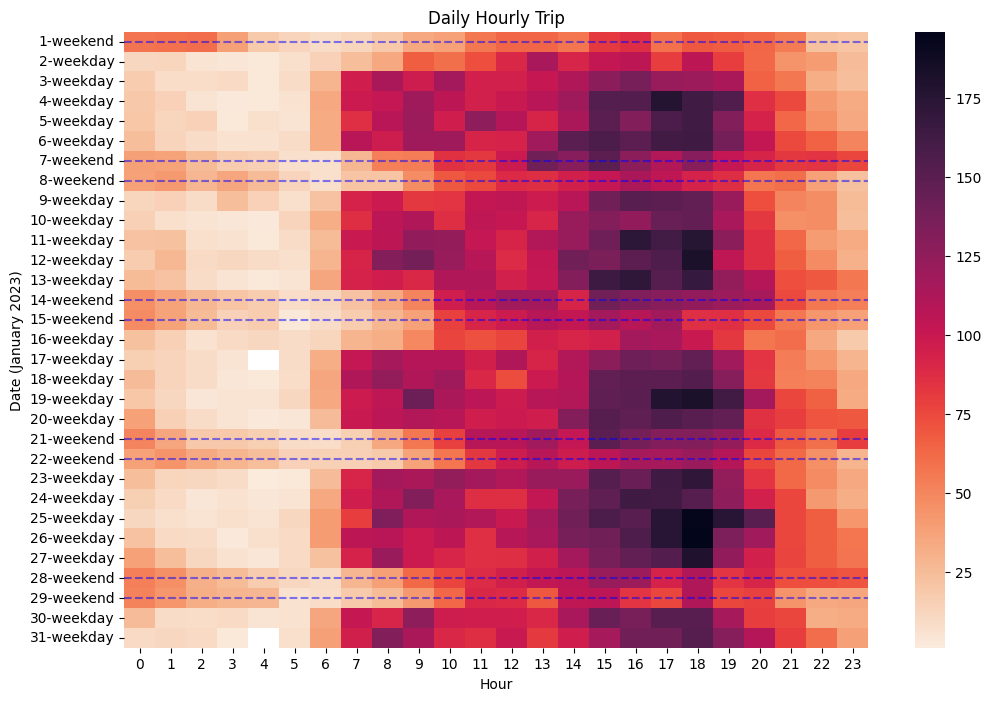

In [122]:
# Code: Daily Hourly Trip (2)

plt.figure(figsize=(12,8))
sns.heatmap(df_heatmap, cmap='rocket_r')
# Adding markers for weekends and weekdays
start_date = '2023-01-01'
end_date = '2023-01-31'
num_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1
for i in range(num_days):
    date = pd.to_datetime(start_date) + pd.DateOffset(days=i)
    if date.weekday() >= 5 :  
        plt.axhline(i + 0.5, color='blue', linestyle='--',alpha=0.5) 

plt.ylabel('Date (January 2023)')
plt.xlabel('Hour')
plt.title('Daily Hourly Trip')
plt.show()

##### Takeaway
Focusing on hourly data, it is shown that most of the volume in January 2023 falls within the rush hour of around 3PM to 7PM.

##### Customer Behavior : Average Hourly Trips By Day

In [123]:
# Code: Average Hourly Trip by Day (1)

df_heatmap_day = df_nyc[['lpep_pickup_datetime', 'day_week', 'hour']]
df_heatmap_day['date'] = df_heatmap_day['lpep_pickup_datetime'].dt.day

df_heatmap_day['day_name'] = df_heatmap_day['lpep_pickup_datetime'].dt.day_name()

df_heatmap_day = df_heatmap_day.groupby(['date', 'day_name', 'day_week', 'hour']).agg(trips=('lpep_pickup_datetime','count')).reset_index()
df_heatmap_day = df_heatmap_day.groupby(['day_name', 'day_week', 'hour']).agg(trips=('trips','mean')).sort_values('day_week', ascending=True).reset_index()

df_heatmap_day = df_heatmap_day.pivot_table(values='trips', index='hour', columns='day_name')

ordering = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_heatmap_day = df_heatmap_day.reindex(columns=ordering)

# for col in df_heatmap_day.columns:
#     df_heatmap_day[col] = df_heatmap_day[col]/df_heatmap_day[col].sum()
df_heatmap_day=df_heatmap_day.T

df_heatmap_day

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Monday,19.00,12.40,7.80,11.40,6.80,6.40,21.80,67.60,74.60,87.60,...,105.00,126.60,130.40,131.80,134.80,104.60,71.40,58.80,40.40,27.20
Tuesday,14.80,9.80,7.20,5.60,3.00,8.60,33.40,95.20,115.60,112.60,...,115.40,130.20,141.40,141.20,143.40,120.40,86.80,62.40,45.00,29.60
Wednesday,19.25,14.25,6.50,4.75,3.50,8.50,34.25,97.75,116.00,116.50,...,122.25,149.50,156.75,165.50,171.75,146.75,101.50,66.75,50.25,36.00
Thursday,19.75,15.00,9.25,5.25,7.00,8.25,34.00,95.25,112.25,124.75,...,125.00,143.25,146.75,166.50,180.75,133.00,103.75,70.50,56.75,38.75
Friday,31.50,18.50,9.50,5.50,3.75,7.00,29.25,98.25,105.00,104.50,...,132.25,152.75,154.00,156.00,165.75,133.50,97.75,76.25,68.00,58.50
Saturday,47.25,39.00,25.75,20.75,16.25,8.75,8.75,23.25,40.25,55.75,...,107.25,140.00,129.50,115.75,124.25,107.25,97.00,74.75,68.25,70.00
Sunday,46.80,45.00,36.20,29.40,22.60,9.80,9.60,16.60,22.40,39.80,...,91.20,102.20,101.60,94.60,96.20,85.20,70.20,55.40,36.80,29.40


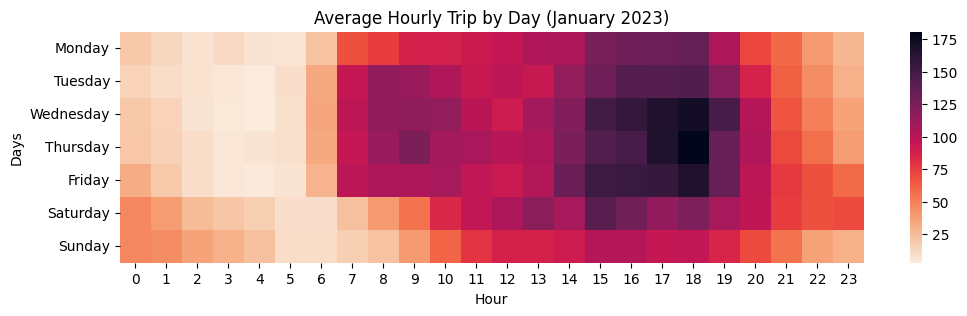

In [124]:
# Code: Average Hourly Trip by Day (2)

plt.figure(figsize=(12,3))
sns.heatmap(df_heatmap_day, cmap='rocket_r')

plt.ylabel('Days')
plt.xlabel('Hour')
plt.title('Average Hourly Trip by Day (January 2023)')
plt.show()

##### Takeaway
In a daily view, it is also very clear that most of the trip volume came from between 3PM (15:00) to 7PM (19:00) which would describe the rush hour times, and the second high volume is shown by the moring rush hour of between 7AM and 10AM within the weekdays.

## Conclusion and Recommendation


### Conclusion
1. Shown by a strong pattern within January 2023, that around the weekdays, especially Thursdays, followed by the day before or after (being Wednesdays and Fridays) are the days with most trip volume.

2. In terms of timing, highest block of trips were shown to be around 3PM (15:00) to 7PM (19:00), followed by second highest block within 7AM (7:00) to 10AM (8:00) wihtin the days mentioned in previous point.

3. Similar hourly volume block shown similar pattern within the weekends, while there also seem to be demands after midnights. Likely coming from late night entertainments within the weekends.

4. Distance-wise, weekdays shown shorter distance trips in January 2023 compared to the weekend counterparts.

5. While the peak weekdays shown average shorter trips, revenue shown to be higher compared to the weekends due to more volume.


### Recommendation
1. **Optimizing supply within peak days and peak hours:** While the peak days and peak hours shown to bring the highest transaction/trip volume and revenues, it seems that there are ceiling of average daily trips within said days within January 2023. This also needs to be adjusted to different factors such as: the historical and projected traffic levels, competitions alongside their supplies and pricings, as well as future trends.

2. **Prioritizing shorter distance trips and potential low hanging fruits:** In terms of having higher revenues, other than optimizing what was mentioned in previous point, there are opportunities shown by other potentially-high volume times such as morning rush hours within the weekdays, afternoon times within the weekends, followed by late night demands in the weekends respectively.